# Title
## Analysing Customer Retention and Churn Patterns in the Telecom Industry
By Oluwaseun Adeyemi | Setember 30, 2025

# Introduction

In today’s highly competitive telecom industry, customer retention is critical to sustaining growth and profitability. With multiple service providers offering similar packages, retaining customers has become more challenging than ever. Customer churn—the phenomenon where subscribers discontinue their services—represents a significant threat to revenue and market share. 

The dataset under consideration, obtained from [Kaggle](https://www.kaggle.com/datasets/mubeenshehzadi/customer-churn-dataset?select=Telco_Cusomer_Churn.csv), contains information on **7,043 telecom customers** across **21 features**, including demographic details, subscribed services (phone, internet, streaming), billing and payment methods, and whether the customer eventually churned. 

By analyzing these variables, businesses can **identify key drivers of churn**, understand **retention patterns**, and develop **predictive models** that anticipate customer departure. This insight can guide targeted interventions, loyalty programs, and pricing strategies to reduce churn and maximize profitability. 

# Problem Statement

Despite the wide range of services and competitive pricing strategies, telecom companies continue to face high customer churn rates. Losing customers not only reduces revenue but also increases the cost of acquiring new customers to replace them. Without a clear understanding of **which factors contribute most to churn**, telecom operators risk failing to retain valuable customers, misallocating resources, and diminishing long-term profitability.

Therefore, there is a pressing need to analyze customer behavior patterns, identify churn drivers, and build predictive models that can help in proactive retention strategies.

# Objectives

The primary objectives of this study are:

1. **To explore and analyze customer demographics, service usage, and billing information** in relation to churn behavior.
2. **To identify key factors driving churn** (e.g., contract type, internet service, payment method, monthly charges).
3. **To build predictive models** that can accurately classify customers as likely to churn or stay.
4. **To provide actionable insights** that can support telecom companies in designing customer retention strategies, such as personalized offers, service improvements, and targeted loyalty programs.
5. **To evaluate and compare different machine learning models** in predicting churn, ensuring accuracy and interpretability for business use.

# Features Description  

- **customerID**: Unique ID assigned to each customer  
- **gender**: Gender of the customer *(Male, Female)*  
- **seniorcitizen**: Indicates if the customer is a senior citizen *(1 = Yes, 0 = No)*  
- **partner**: Whether the customer has a partner *(Yes/No)*  
- **dependents**: Whether the customer has dependents *(Yes/No)*  
- **tenure**: Number of months the customer has stayed with the company  
- **phoneservice**: Indicates if the customer has a phone service *(Yes/No)*  
- **multiplelines**: If the customer has multiple phone lines *(No, Yes, No phone service)*  
- **internetservice**: Type of internet service *(DSL, Fiber optic, No)*  
- **onlinesecurity**: Whether the customer has online security add-on *(Yes, No, No internet)*  
- **onlinebackup**: Whether the customer has online backup service *(Yes, No, No internet)*  
- **deviceprotection**: Device protection plan *(Yes, No, No internet)*  
- **techsupport**: Tech support service *(Yes, No, No internet)*  
- **streamingTV**: Access to streaming TV *(Yes, No, No internet)*  
- **streamingmovies**: Access to streaming movies *(Yes, No, No internet)*  
- **contract**: Type of contract *(Month-to-month, One year, Two year)*  
- **paperlessbilling**: Whether billing is paperless *(Yes/No)*  
- **paymentmethod**: Customer’s method of payment *(Electronic check, Mailed check, Bank transfer, Credit card)*  
- **monthlycharges**: Amount charged to the customer monthly  
- **totalcharges**: Total amount charged during the customer’s tenure  
- **churn**: Indicates whether the customer left the company *(Yes = churned, No = retained)*  

In [1]:
# import necessary libraries
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the datatset
df = pd.read_csv("Telco_Customer_Churn.csv")

In [3]:
# checking the top 2 rows
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


# Data inspection, understanding and cleaning

In [4]:
# checking the summay info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# converting total charges to float
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0').astype(float)

In [6]:
# checking the summay info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Dataset Observations 

**Dataset Size & Structure**

   * The dataset contains **7,043 rows** and **21 columns**, representing individual telecom customers and their attributes.
   * The **memory footprint** is moderate (~1.1 MB), making it manageable for typical data analysis workflows.

**Target Variable**

   * The column `Churn` indicates whether a customer has left the service (`Yes`) or stayed (`No`).
   * All 7,043 entries are non-null, ensuring a complete target column.

**Feature Types**

   * **Categorical Features (17 columns)**: Includes `gender`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`, and `customerID`.
   * **Numerical Features (4 columns)**: `SeniorCitizen`, `tenure`, `MonthlyCharges`, `TotalCharges`.
   * Note: `TotalCharges` was originally an object type and has been **converted to float** for proper numerical analysis.

**Data Completeness**

   * There are **no missing values** across all 21 columns, which simplifies preprocessing.

**Data Types**

   * Object types dominate (17 columns), which will require encoding before modeling.
   * Two numerical columns are floats (`MonthlyCharges`, `TotalCharges`) and two are integers (`SeniorCitizen`, `tenure`).

**Potential Preprocessing Needs**

   * Encode categorical features (`object` type) for modeling.
   * Scale numerical features for models sensitive to feature magnitude (e.g., MLP).
   * Balance the target variable `Churn` because churn is typically **imbalanced** in telecom datasets.

**Key Insight:** The dataset is **complete** and **well-structured**, with `TotalCharges` now correctly numeric. Preparing features (encoding, scaling, and balancing) will be crucial for building effective predictive models.

# Descriptive Statistics
 - Descriptive statistics was done to: explore, clean, and understand the dataset before building machine learning models. 
 - It helps spot outliers, missing values, skewness, and feature importance patterns early on.

In [7]:
# descriptive statistics
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.73,2266.79,0.00,398.55,1394.55,3786.60,8684.80


# Interpretation and insights

**SeniorCitizen**

   * Mean = **0.16** → Only **16%** of customers are senior citizens.
   * Distribution is highly skewed toward **non-senior customers (84%)**.
   * This indicates the customer base is largely **younger or middle-aged**, which may affect service preferences and churn patterns.

**Tenure (Months with the company)**

   * Mean = **32.37 months (~2.7 years)**, with a standard deviation of **24.56**.
   * Min = **0 months** (new customers) → Max = **72 months (6 years)**.
   * Quartiles:

     * 25% stayed less than **9 months** (high early churn risk).
     * 50% stayed **29 months** (median).
     * 75% stayed more than **55 months**, showing strong retention for long-term customers.
   * **Insight:** Retention improves significantly after the first year. Early months are the most critical for churn.

**MonthlyCharges**

   * Mean = **$64.76**, ranging from **$18.25** to **$118.75**.
   * 25% of customers pay **< $35.5** (basic/low-tier plans).
   * 50% pay about **$70.35** (median).
   * 25% pay **> $89.85**, close to the maximum, likely due to multiple services (fiber optic, streaming).
   * **Insight:** Higher monthly charges may correlate with higher churn if customers perceive poor value.

**TotalCharges**

   * Mean = **$2,279.73**, but highly variable (std = **$2,266.79**).
   * Ranges from **$0 (new customers)** to **$8,684.80 (long-term, high-paying customers)**.
   * Quartiles:

     * 25% paid **< $398.55** (new/short-term customers).
     * 50% paid **$1,394.55**.
     * 75% paid **> $3,786.60**, reflecting long-term subscribers.
   * **Insight:** Customers with low TotalCharges are new/short-tenure customers who are at higher churn risk, while high spenders represent loyal long-term customers.

### Key Insights

* **Churn risk is highest in the first year (tenure < 12 months).**
* **Senior citizens** form a small segment (16%) but may have distinct churn patterns worth analyzing.
* **High monthly charges** could drive dissatisfaction, especially among newer customers.
* **TotalCharges** strongly reflects customer lifetime value (CLV) — low values → at-risk customers, high values → loyal and retained.

# Feature engineering
This is the process of creating, transforming, or selecting features (variables) from raw data to make machine learning models more accurate, interpretable, and efficient.

In [8]:
# checking the columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# separating the columns into numerical and categorical
num_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [10]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [11]:
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

# Exploratory Data Analysis (Visualization)
Visualization is the process of representing data visually—using charts, graphs, or plots—to make patterns, trends, and insights easier to understand.

## Why It’s Important:

 - Understand Data Quickly: Spot trends, outliers, and relationships at a glance.
 - Communicate Insights: Makes findings clearer for stakeholders or decision-makers.
 - Support Analysis: Helps identify issues like missing values, skewed distributions, or correlations.
 - Guide Modeling: Reveals which features are important or need transformation. In short: Visualization turns raw data into clear, actionable insights, supporting better analysis and decision-making.

# Visualizing the target column - Churn

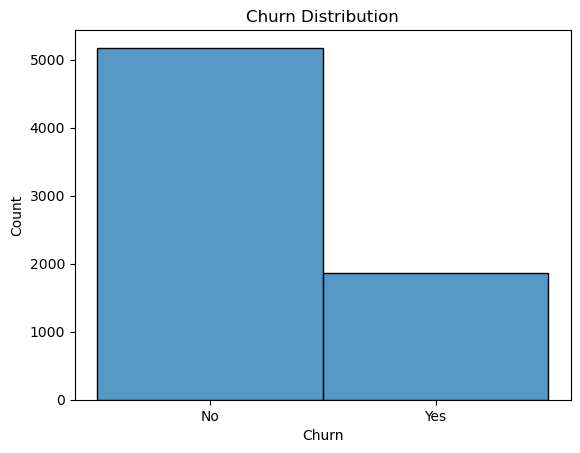

In [12]:
# visualizing the distribution of the target column

sns.histplot(data=df, x="Churn", bins=10)
plt.title("Churn Distribution")
plt.show()

# Interpretation and insights

**Churn Distribution:**

* **No (Retained Customers):** 5,174 (73.46%) 
  The majority of customers stayed with the company, indicating that retention strategies and overall satisfaction are working for most.

* **Yes (Churned Customers):** 1,869 (26.54%) 
  Over a quarter of the customers left the company. In telecom, even single-digit churn percentages can significantly impact revenue, so this is a substantial concern.

**Key Insights:**

1. **High Churn Risk:** Losing 1 in 4 customers is a strong signal that proactive retention measures are necessary.
2. **Retention vs Acquisition Costs:** Acquiring new customers is typically more expensive than retaining existing ones, meaning this churn rate could increase operational costs.
3. **Targeted Interventions Needed:** The churned group should be further analyzed by **contract type, tenure, monthly charges, and service usage** to identify patterns and common drivers.
4. **Benchmarking:** Churn rates above 20% are considered high in subscription-based industries. This dataset shows the company faces retention challenges that must be addressed.

**Class Imbalance:**

* The target column (**Churn**) is imbalanced: 73.5% retained vs 26.5% churned.
* **Implication:** Models trained on this dataset may be biased toward predicting the majority class (**No churn**).
* **Action Required:** The dataset should be balanced (e.g., using **SMOTE** or other resampling techniques) to improve model performance on minority class prediction.

**Overall:**
While the company retains most customers (73.5%), the **26.5% churn rate** is a red flag. Without corrective measures—loyalty programs, personalized offers, or service improvements—this could hurt **long-term profitability**.

# Visualizing the numerical columns and Churn
 - Visualizing numerical features like senior citizen, tenure, monthly charges helps understand their relationship with churn, detect outliers, compare distributions, and confirm feature importance.
 - It also enhances storytelling by translating data into clear, intuitive insights for stakeholders.

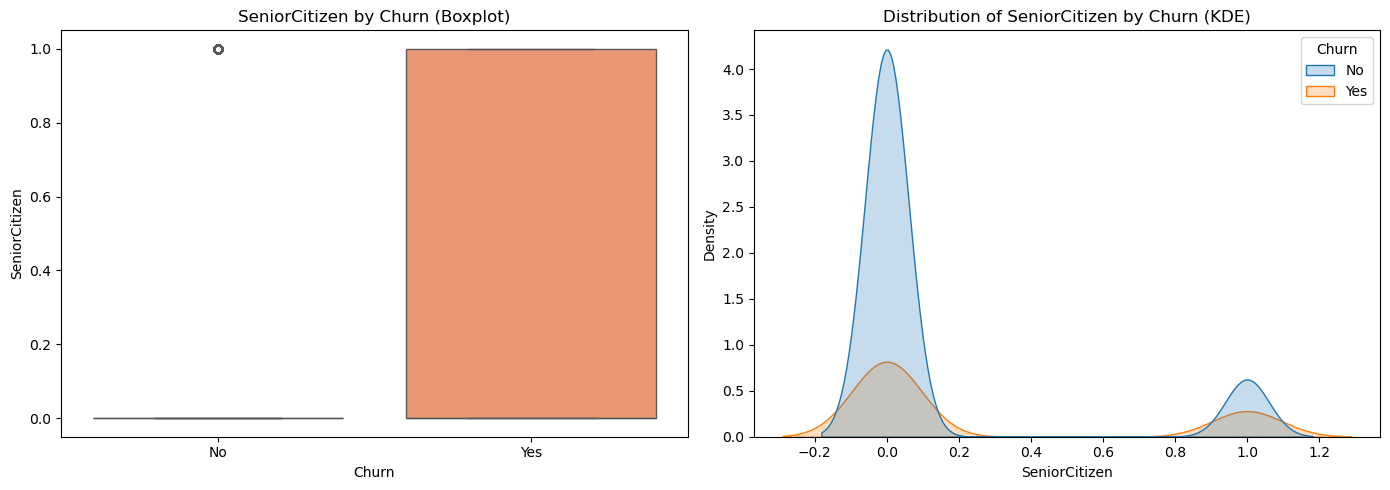


 Churn Summary by SeniorCitizen Quartiles:


,SeniorCitizen_bin,Customers,Churned,Churn Rate (%)
0,"(-0.001, 1.0]",7043,1869,26.54


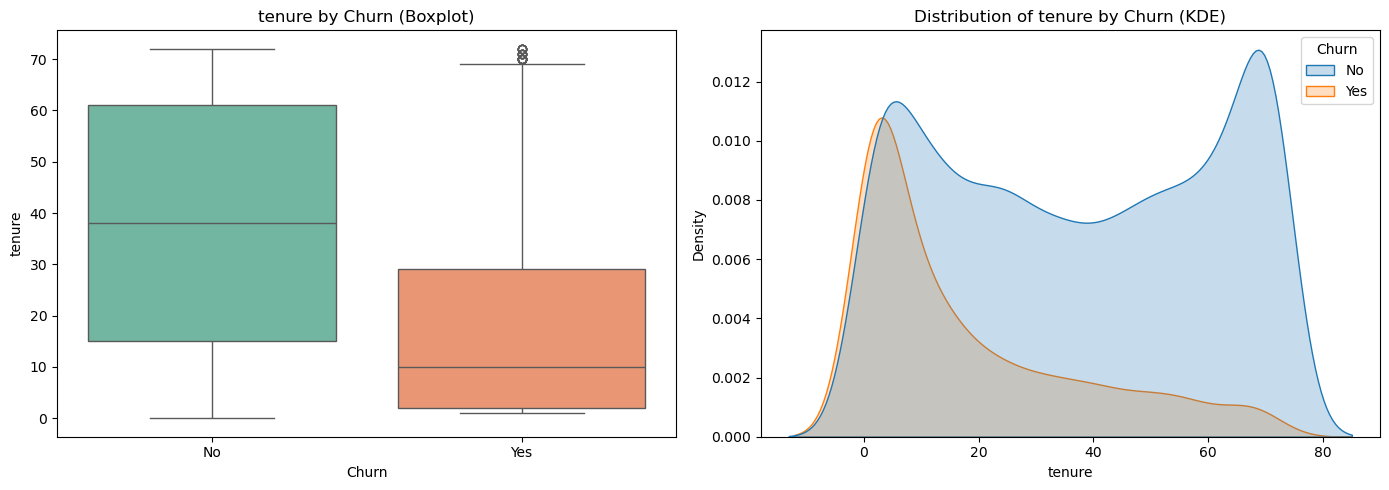


 Churn Summary by tenure Quartiles:


,tenure_bin,Customers,Churned,Churn Rate (%)
0,"(-0.001, 9.0]",1854,923,49.78
1,"(9.0, 29.0]",1715,486,28.34
2,"(29.0, 55.0]",1719,324,18.85
3,"(55.0, 72.0]",1755,136,7.75


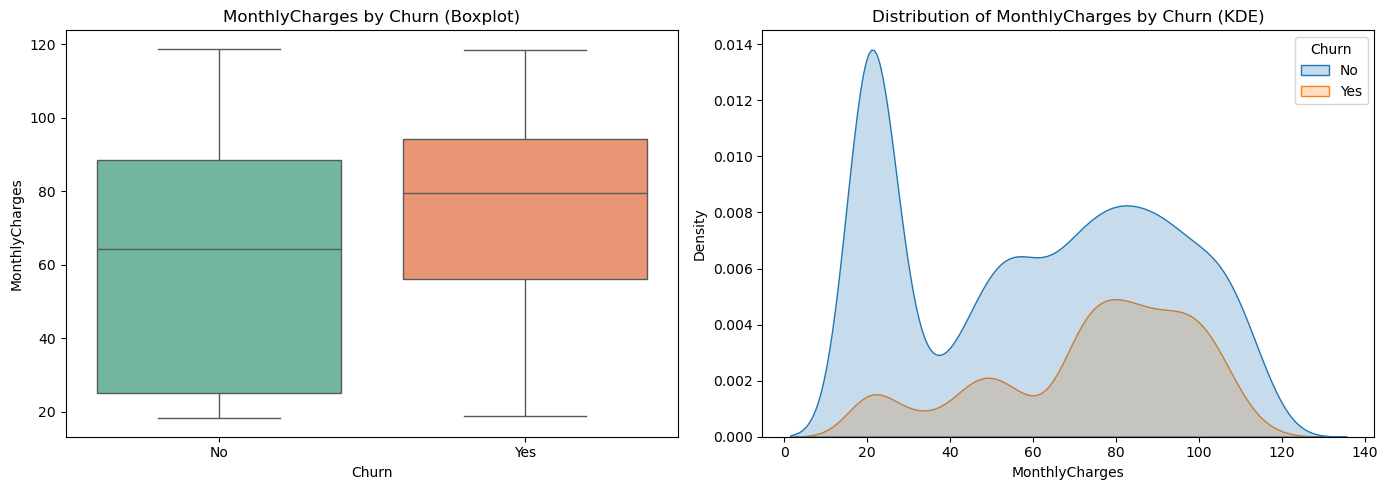


 Churn Summary by MonthlyCharges Quartiles:


,MonthlyCharges_bin,Customers,Churned,Churn Rate (%)
0,"(18.249, 35.5]",1762,198,11.24
1,"(35.5, 70.35]",1766,434,24.58
2,"(70.35, 89.85]",1757,659,37.51
3,"(89.85, 118.75]",1758,578,32.88


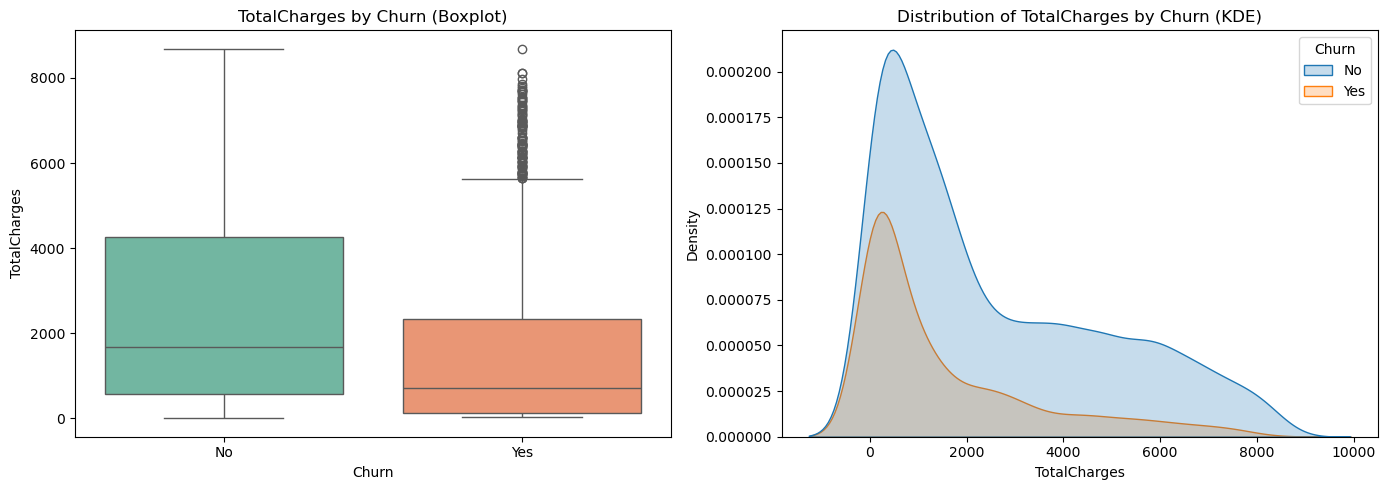


 Churn Summary by TotalCharges Quartiles:


,TotalCharges_bin,Customers,Churned,Churn Rate (%)
0,"(-0.001, 398.55]",1762,762,43.25
1,"(398.55, 1394.55]",1760,447,25.40
2,"(1394.55, 3786.6]",1760,405,23.01
3,"(3786.6, 8684.8]",1761,255,14.48


In [13]:
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Boxplot
    sns.boxplot(data=df, x="Churn", y=col, palette="Set2", ax=axes[0])
    axes[0].set_title(f"{col} by Churn (Boxplot)")

    # KDE plot
    sns.kdeplot(data=df, x=col, hue="Churn", fill=True, ax=axes[1])
    axes[1].set_title(f"Distribution of {col} by Churn (KDE)")

    plt.tight_layout()
    plt.show()

    # SUMMARY TABLE
    # Bin numeric column into 4 quantiles
    df[f'{col}_bin'] = pd.qcut(df[col], q=4, duplicates='drop')

    # Calculate churn rate per bin
    summary = (
        df.groupby(f'{col}_bin', observed=False)
          .agg(
              Customers=('Churn', 'count'),
              Churned=('Churn', lambda x: (x == 'Yes').sum())
          )
          .reset_index()
    )
    summary["Churn Rate (%)"] = round((summary["Churned"] / summary["Customers"]) * 100, 2)

    print(f"\n Churn Summary by {col} Quartiles:")
    display(summary)

    # Drop temp bin column
    df.drop(columns=[f'{col}_bin'], inplace=True)

# Interpretation and Insights

### Senior Citizen

* **Bin = (–0.001, 1.0]** → Represents both non-senior (0) and senior (1) customers lumped together.
* **Churn Rate: 26.54% (overall).**
* **Interpretation:** Being a senior citizen by itself doesn’t strongly differentiate churn risk, since the churn rate mirrors the overall churn rate (≈26.5%). Other factors like **contract type, tenure, and charges** likely have stronger influence.

### Tenure

* **0–9 months:** Churn rate = **49.78%** → Nearly half of new customers leave within the first year.
* **9–29 months:** Churn rate drops to **28.34%**.
* **29–55 months:** Falls further to **18.85%**.
* **55–72 months:** Very low churn = **7.75%**.
* **Interpretation:** Customer loyalty grows with tenure. Early-stage customers (especially first year) are **highly at risk**. Retention strategies should focus on **onboarding, engagement, and incentives** for new customers.

### Monthly Charges

* **Low charges (18–35.5):** Churn rate = **11.24%** → Customers with low charges are the most stable.
* **Mid charges (35.5–70.35):** Churn increases to **24.58%**.
* **High charges (70.35–89.85):** **Peak churn** at **37.51%**.
* **Very high charges (89.85–118.75):** Slightly lower at **32.88%**, but still high.
* **Interpretation:** Customers with higher monthly charges churn more (likely due to **perceived high cost vs. value**). Price-sensitive customers are at risk — especially in the **$70–90 range**.

### Total Charges (Lifetime Spending Quartiles)

* **0 – 398.55:** Churn = **43.25%** → Very high churn. Mostly **new/short-tenure customers**.
* **398.55 – 1,394.55:** Churn = **25.40%** → Noticeable improvement in stability.
* **1,394.55 – 3,786.60:** Churn = **23.01%** → Even more stable, customers invested longer.
* **3,786.60 – 8,684.80:** Churn = **14.48%** → **Most loyal, high-value customers.**
* **Interpretation:** Churn **decreases as TotalCharges increase**. New/low-spend customers are the most vulnerable, while long-term high-value customers are the most loyal.

## Overall Insights

1. **Tenure is the strongest predictor:** Early customers (<1 year) are most likely to churn.
2. **Monthly charges drive dissatisfaction:** Higher monthly bills → higher churn, especially $70–90 range.
3. **TotalCharges highlights loyalty:** Higher lifetime spending is strongly tied to retention.
4. **SeniorCitizen is weak on its own:** Doesn’t explain churn differences much, but may interact with tenure and charges.

## Business Actions

* **Retention focus on new customers:** Build stronger onboarding and engagement in first year.
* **Price-sensitive strategies:** Loyalty discounts or tiered pricing for high-bill customers.
* **Upsell & bundle:** Encourage customers to adopt more services early, increasing TotalCharges (lifetime value) and reducing churn.
* **Protect high-value customers:** Reward long-term loyal customers with perks, since they are least likely to churn but most profitable.

# Visualizing the categorical columns with Churn

 - Visualizing categorical columns with Churn helps identify high-risk customer segments, understand relationships between features and churn, guide feature engineering for modeling, and communicate insights to stakeholders. 
 - It highlights which categories have higher churn rates, reveals imbalances, and informs targeted retention strategies

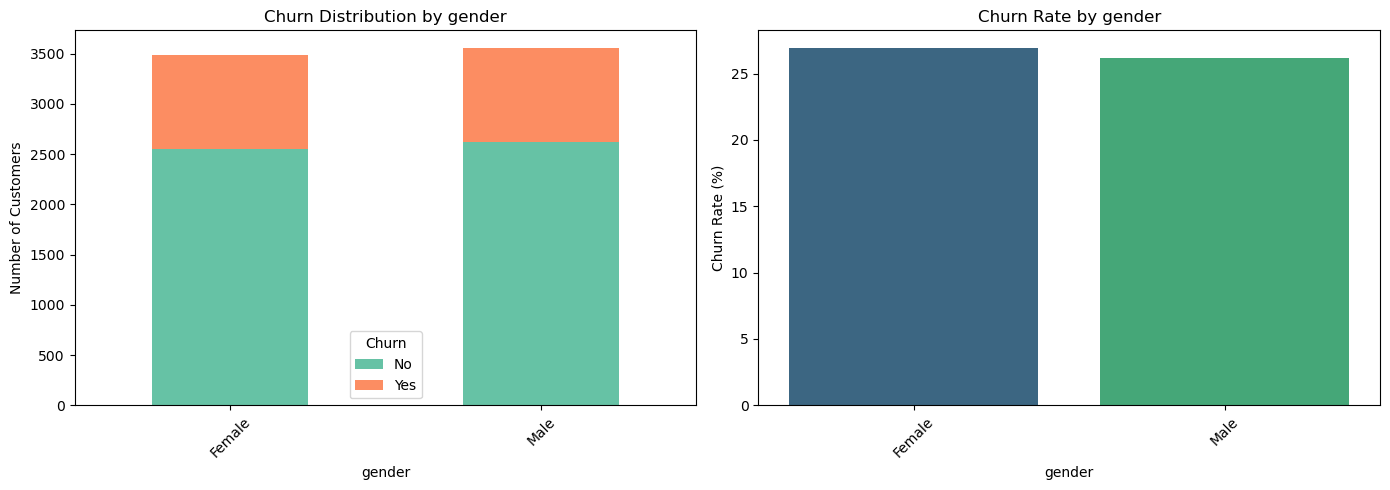

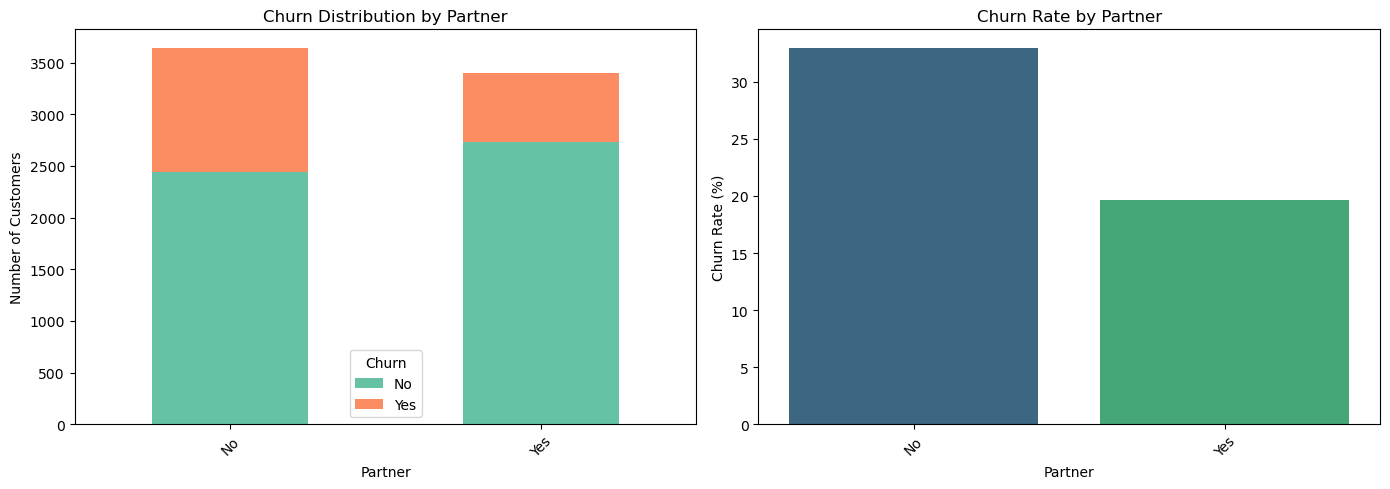

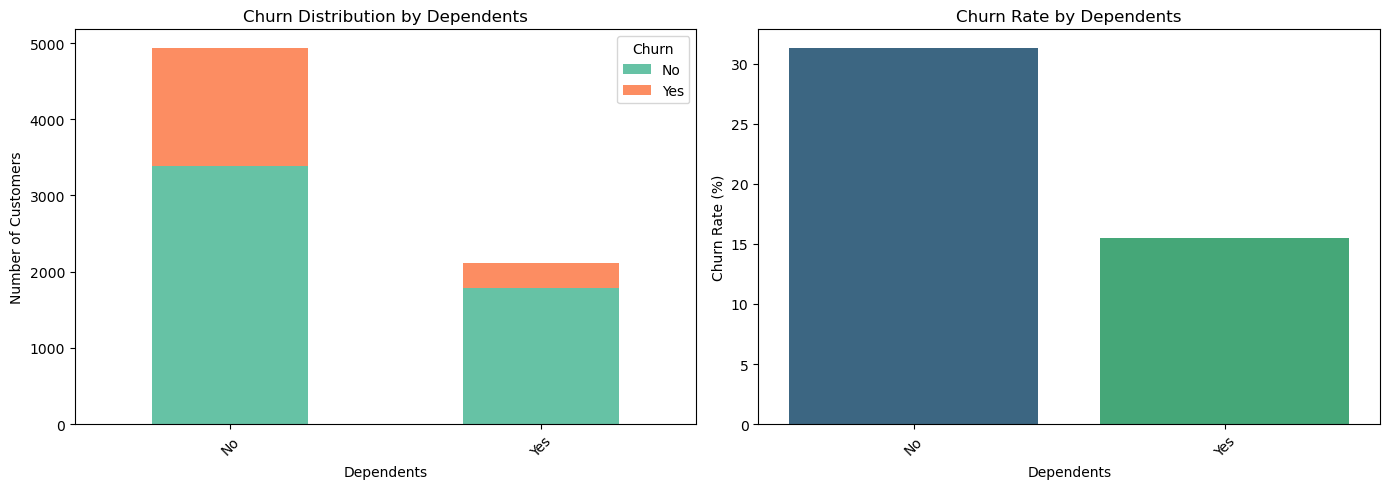

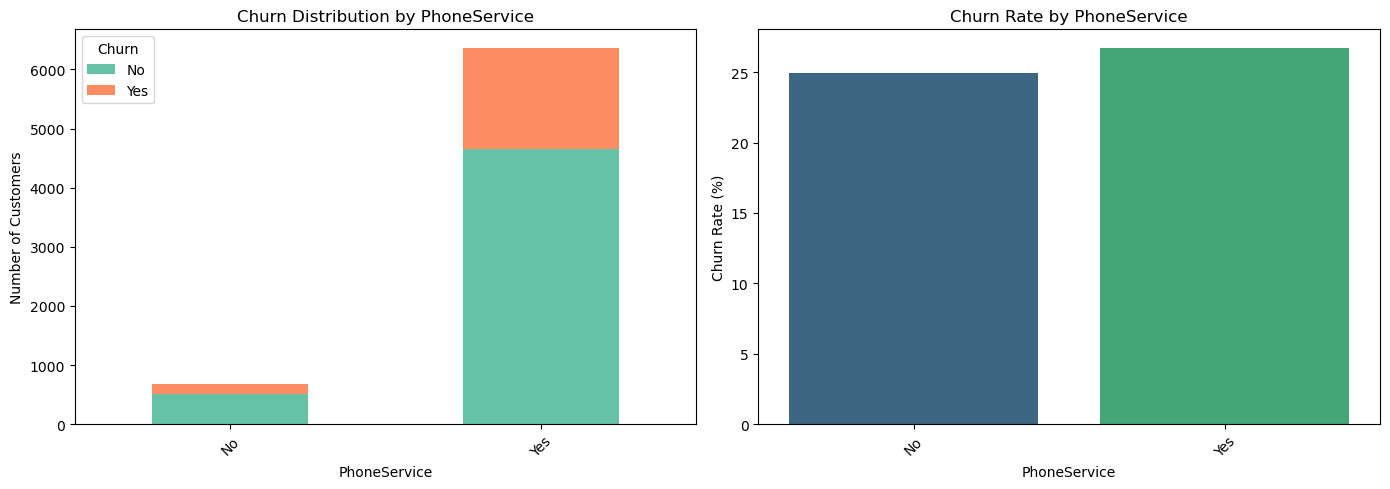

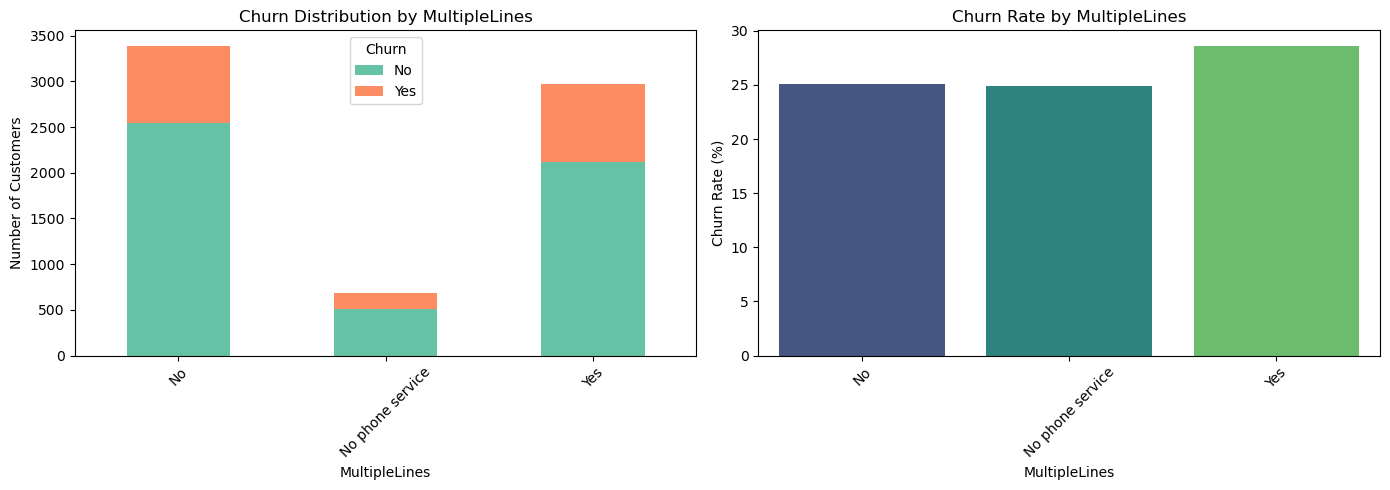

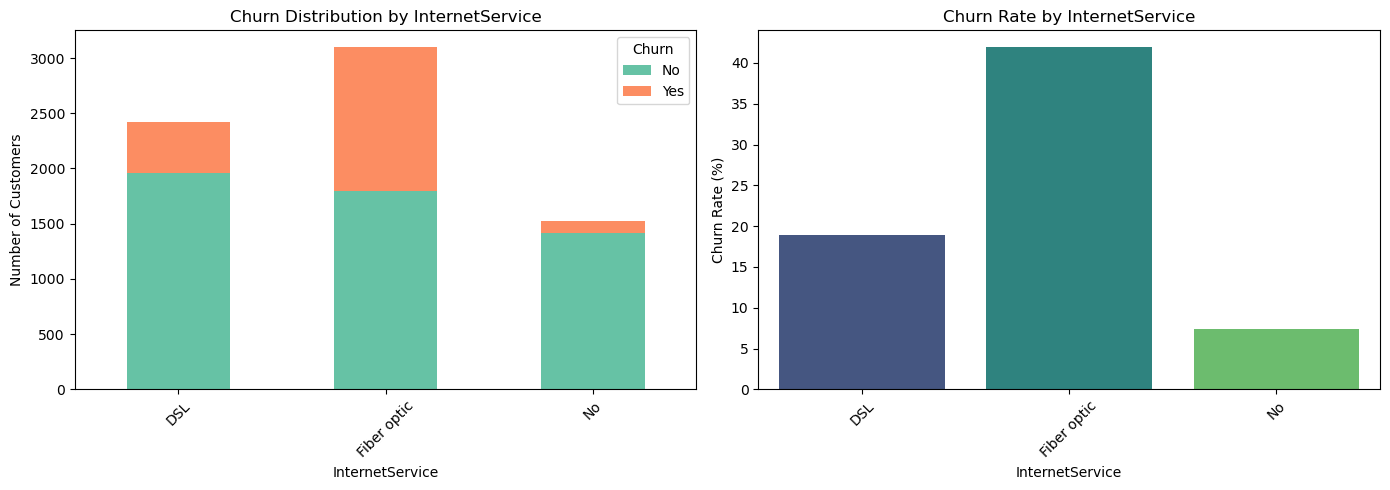

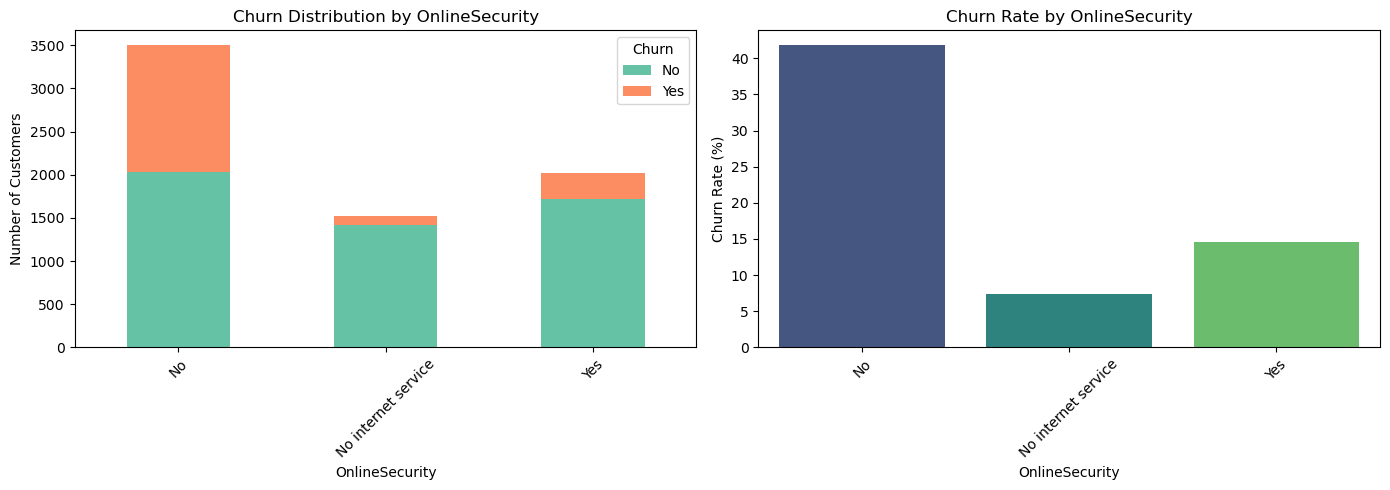

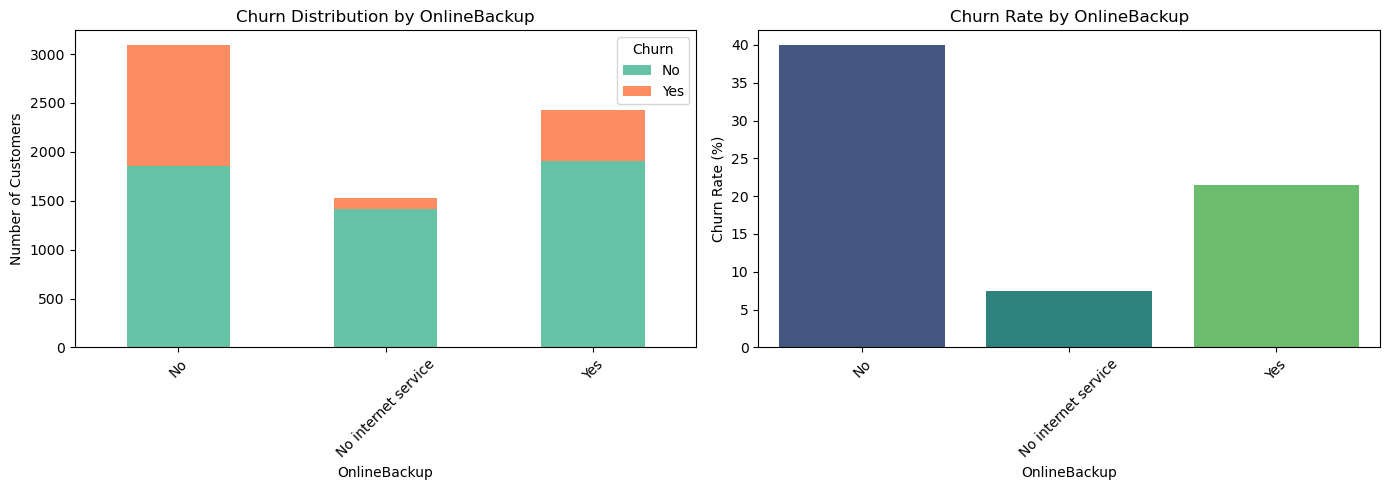

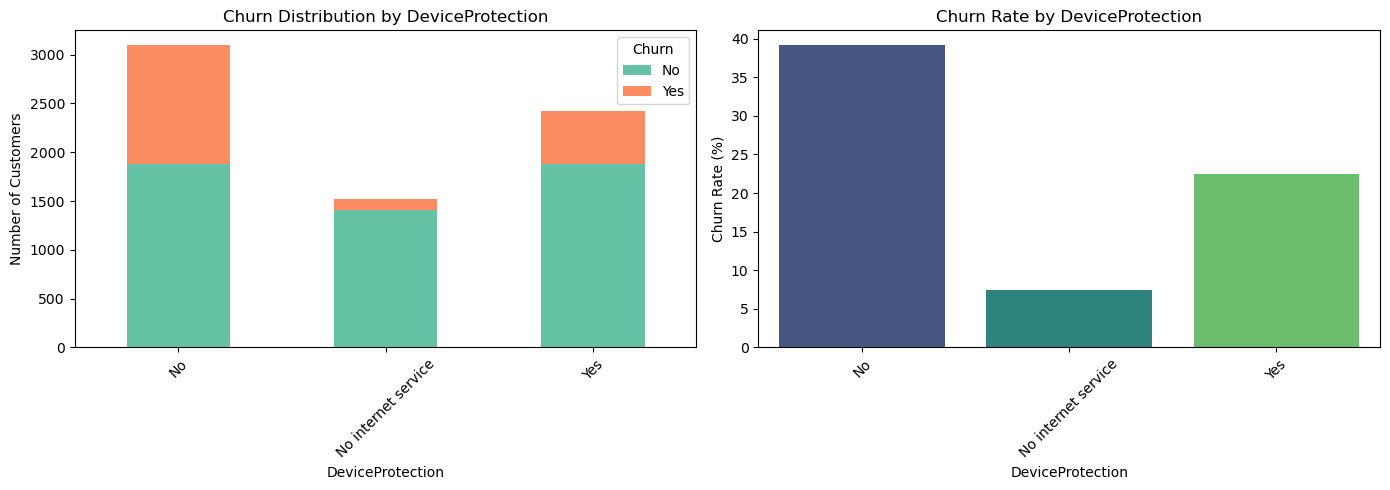

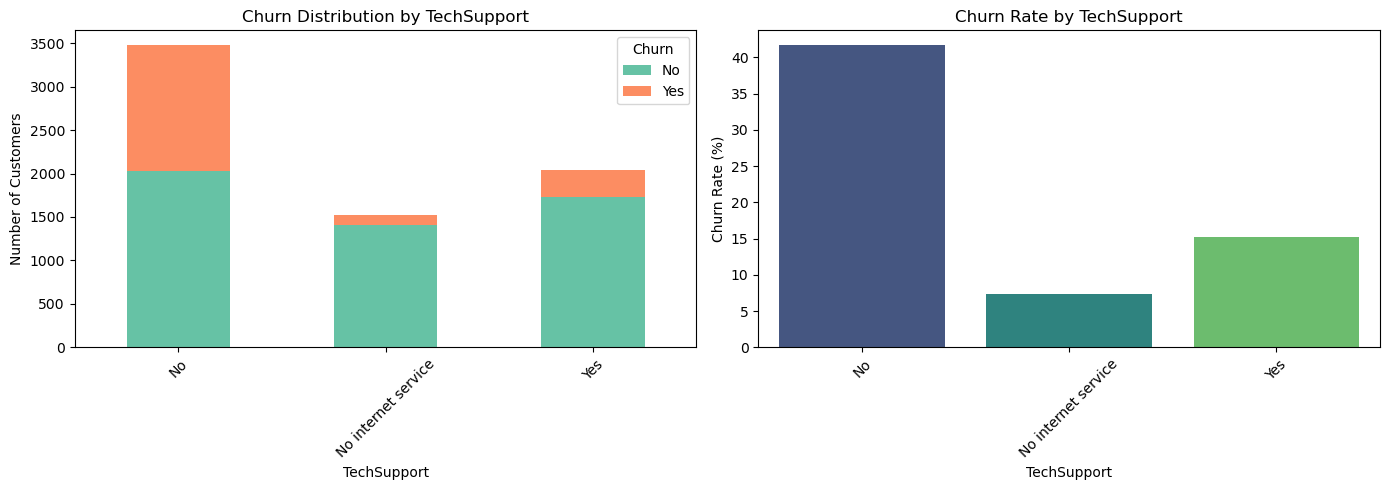

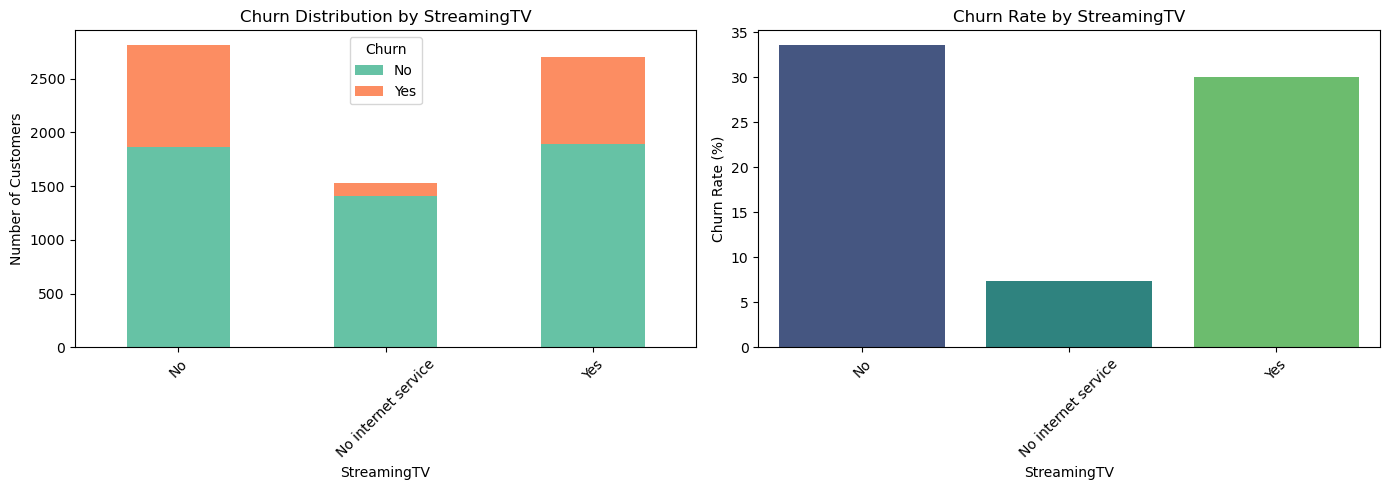

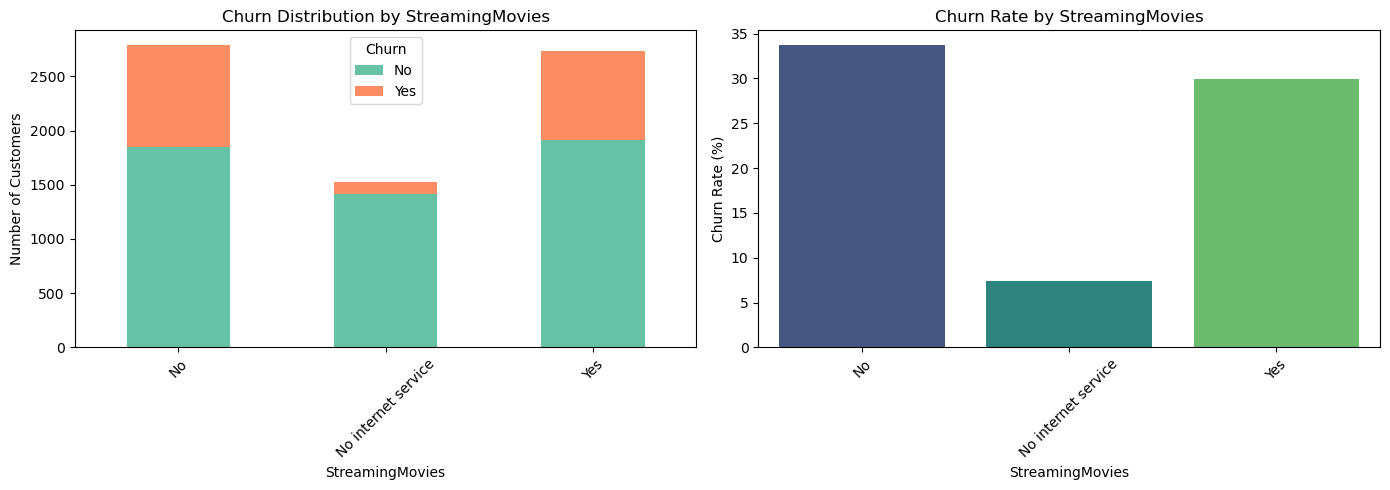

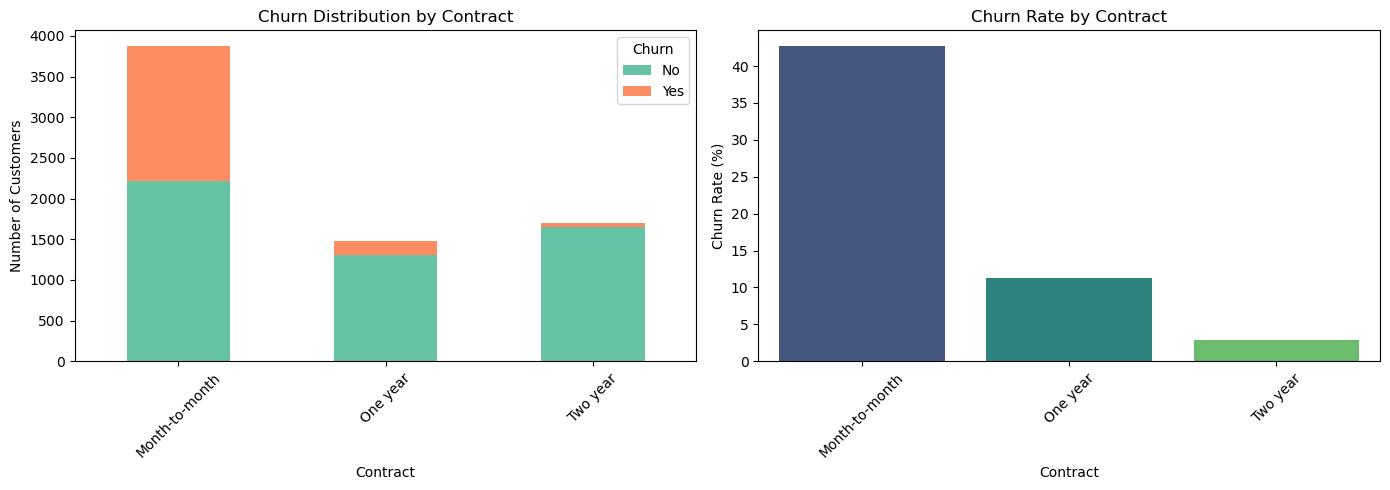

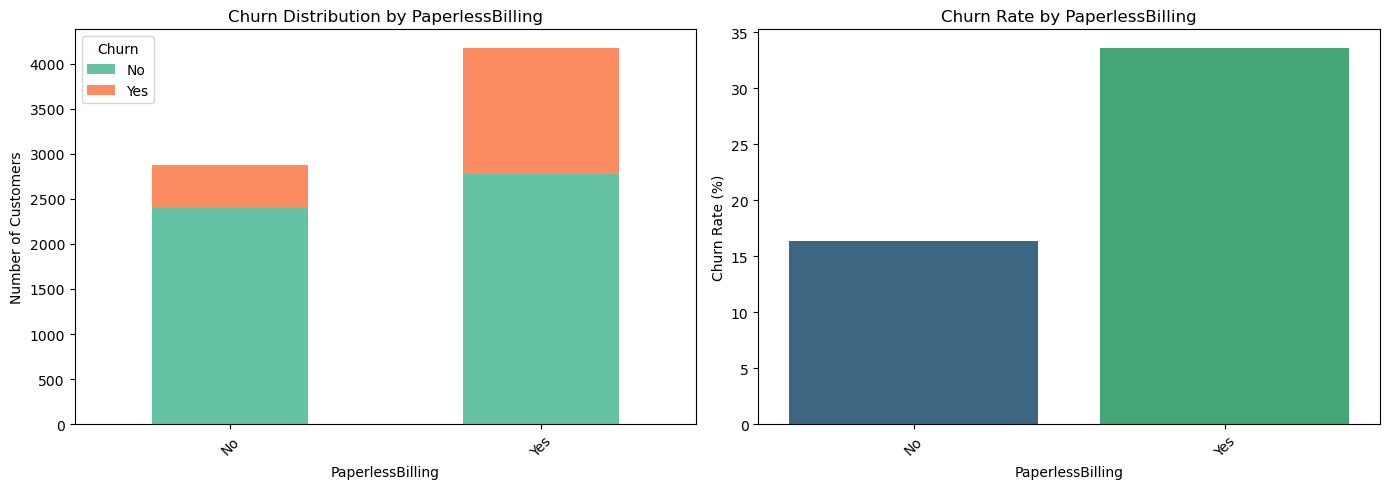

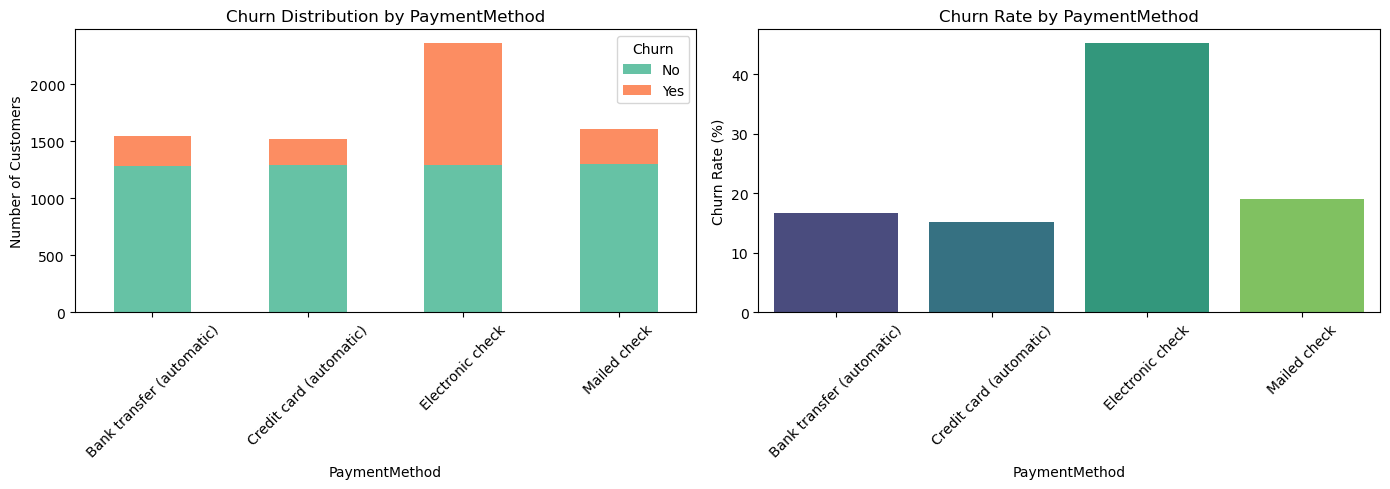

In [14]:
# Convert Churn to numeric for churn rate calculations
df['Churn_num'] = df['Churn'].map({'No':0, 'Yes':1})

# List of categorical columns to explore
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
            'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 
            'PaperlessBilling', 'PaymentMethod']

for col in cat_cols:
    plt.figure(figsize=(14,5))
    
    # Stacked Bar Plot (Counts)
    plt.subplot(1, 2, 1)
    churn_ct = pd.crosstab(df[col], df['Churn'])
    churn_ct.plot(kind='bar', stacked=True, ax=plt.gca(),
                  color=["#66c2a5", "#fc8d62"])
    plt.title(f"Churn Distribution by {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Customers")
    plt.xticks(rotation=45)
    plt.legend(title="Churn")
    
    # Bar Plot (Churn Rate %)
    plt.subplot(1, 2, 2)
    churn_rate = df.groupby(col)['Churn_num'].mean().reset_index()
    churn_rate['Churn Rate (%)'] = churn_rate['Churn_num'] * 100
    sns.barplot(data=churn_rate, x=col, y='Churn Rate (%)', palette="viridis")
    plt.title(f"Churn Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Churn Rate (%)")
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Interpretations & Insights

### **Gender**

* Female churn rate: **26.9%**, Male: **26.2%**.
    - Gender has **little to no effect** on churn.

### **Partner**

* Customers without a partner churn at **33%**, while those with a partner churn only **~20%**.
   - Having a partner seems to **increase customer stickiness**.

### **Dependents**

* No dependents → **31.3% churn**, With dependents → **15.5% churn**.
   - Customers with dependents are **much more loyal**.

### **Phone Service**

* Little difference: No phone service (24.9%) vs Yes (26.7%).
   - Phone service is **not a strong churn driver**.

### **Multiple Lines**

* Single line: **25.0% churn**, Multiple lines: **28.6% churn**.
   - Having multiple lines slightly **increases churn risk**, possibly due to higher bills.
 
### **Internet Service**

* Fiber optic → **41.9% churn** (highest).
* DSL → **19% churn**.
* No internet → **7.4% churn**.
   - Fiber optic customers are at **highest churn risk**, probably due to **higher charges or competition**.

### **Online Security**

* No security: **41.8% churn**, Yes: **14.6% churn**.
   - Security add-ons **reduce churn risk** significantly.

### **Online Backup**

* No backup: **39.9% churn**, Yes: **21.5% churn**.
   - Backup service also **helps retain customers**.
   
### **Device Protection**

* No protection: **39.1% churn**, Yes: **22.5% churn**.
   - Customers with device protection are **more loyal**.

### **Tech Support**

* No support: **41.6% churn**, Yes: **15.2% churn**.
   - Tech support is one of the **strongest retention factors**.
 
### **Streaming Services (TV & Movies)**

* Churn is **~30–34%** regardless of streaming service.
   - Streaming **does not significantly impact churn**.

### **Contract**

* Month-to-month: **42.7% churn**.
* One year: **11.3% churn**.
* Two year: **2.8% churn**.
   - Contract type is the **strongest churn predictor**. Long-term contracts = **low churn**.                                                                           
 
### **Paperless Billing**

* Paperless → **33.6% churn**, Non-paperless → **16.3% churn**.
   - Paperless billing customers churn **twice as much**, possibly because most paperless users are **month-to-month or online check payers**.

### **Payment Method**

* Electronic check: **45.3% churn** (worst).
* Bank transfer: **16.7%**, Credit card: **15.2%**, Mailed check: **19.1%**.
   - Customers paying by **electronic check are most at risk**, while automatic payments reduce churn.

## Overall Insights

**High-risk groups:**

   * Month-to-month contracts
   * Fiber optic internet users
   * Customers without online security, backup, device protection, or tech support
   * Paperless billing + electronic check payments

**Low-risk groups:**

   * Two-year contracts
   * Customers with dependents or partners
   * DSL or no-internet customers
   * Customers with support services (security, backup, tech support)
   * Automatic payment users

**Retention Strategy:** Target **month-to-month + fiber optic + electronic check** customers with loyalty discounts, service bundles (security/tech support), and incentives to move to longer contracts or auto-pay.

# Correlation Matrix
A Correlation Heatmap is used show how strongly numerical variables are related.

It will help to:

 - Find patterns – spot variables that move together.
 - Detect redundancy – identify features that are too similar (multicollinearity).
 - Guide feature selection – keep useful predictors, drop duplicates.
 - Check data quality – unusual correlations may signal errors.
 - Quick visual insight – colors make patterns obvious.

# Correlation Heatmap (Numerical Features Only)

Showing relationships among the numeric features and churn (encoding churn as 0/1).

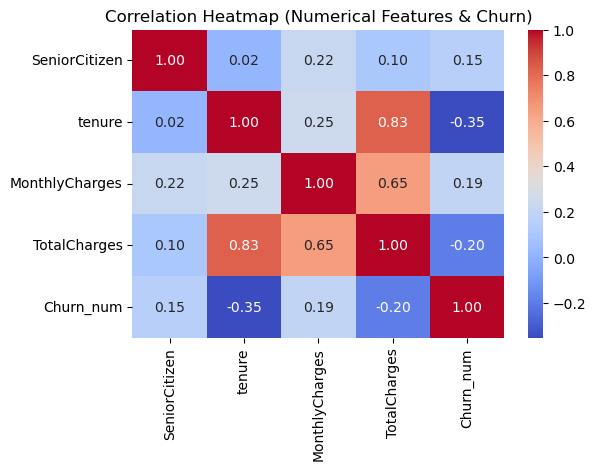

In [15]:
# Encode Churn as numeric
df['Churn_num'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Select numerical columns including Churn_num
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_num']

# Correlation matrix
corr = df[num_cols].corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features & Churn)")
plt.show()

# Interpretation and insight 

### SeniorCitizen → **Correlation: +0.15**

* Weak positive correlation with churn.
* Seniors are **slightly more likely** to churn than younger customers, but the effect is **not strong**.

### Tenure → **Correlation: –0.35**

* Strongest relationship with churn (negative).
* Customers with **longer tenure are much less likely** to churn.
* Early-tenure customers (especially <12 months) are the **highest churn risk**.

### MonthlyCharges → **Correlation: +0.19**

* Moderate positive correlation with churn.
* Customers with **higher monthly bills are more likely** to churn, likely due to price sensitivity or perceived value mismatch.
* Especially noticeable in the $70–90 charge range.

### TotalCharges → **Correlation: –0.20**

* Moderate negative correlation with churn.
* Since **TotalCharges = tenure × monthly charges**, higher values reflect **longer-staying customers** who are naturally less likely to churn.
* Consistent with tenure being the strongest factor.

## Overall Insights

1. **Tenure is the most important predictor** → customers with short tenure are at the highest churn risk.
2. **High monthly charges increase churn risk** → suggests cost/value concerns.
3. **SeniorCitizen has limited predictive power** alone but may interact with other variables.
4. **TotalCharges reinforces tenure’s importance** (longer customers = lower churn).

## Business Actions

* **Retention focus on early-tenure customers**: onboarding, discounts, proactive engagement in the first year.
* **Price-sensitive customer management**: review billing for those with high monthly charges, offer loyalty discounts.
* **Segmentation strategy**: combine **tenure + monthly charges** to pinpoint the riskiest groups.

# Features to Drop (and Why?)

Deciding which features to drop is a critical step in building a churn model. Based on my churn summaries and correlation analysis, here is the breakdown:

## Features to Drop (and Why)

**CustomerID**

   * Reason: Purely an identifier, carries no predictive value for churn.
   * Action: Drop.

**Highly Correlated / Redundant Features**

   * **TotalCharges** is highly correlated with **tenure** and **MonthlyCharges** (`TotalCharges ≈ tenure × MonthlyCharges`).
   * Reason: Keeping it may introduce **multicollinearity**, which can hurt models like logistic regression.
   * Action: Drop **TotalCharges** (since tenure + MonthlyCharges already capture the effect).

**Categorical Features with Low Predictive Power** (Optional, based on testing)

   * **Gender**: Churn rates are nearly identical (Male ≈ 26.9%, Female ≈ 26.1%).
   * Reason: Adds noise but no real discriminatory power.
   * Action: Consider dropping (test with & without).

**Duplicated / Overlapping Service Features** (Optional, depending on encoding strategy)

   * Example: `PhoneService` vs `MultipleLines`. If `PhoneService=No`, then `MultipleLines=No` automatically.
   * Reason: Redundant info, risk of data leakage in encoding.
   * Action: Drop `PhoneService` and just keep `MultipleLines` (or engineer a clean version).

## Features to Keep

* **Tenure, MonthlyCharges** → strongest churn predictors.
* **Contract, PaymentMethod, PaperlessBilling** → strong churn patterns (e.g., Month-to-Month churn = 42%).
* **InternetService & add-on services (OnlineSecurity, TechSupport, etc.)** → strong influence on churn.
* **Partner & Dependents** → useful, as they show lower churn when present.

## Final Drop List 

* `customerID` (identifier)
* `TotalCharges` (multicollinearity with tenure & MonthlyCharges)
* `gender` (weak signal, almost no churn difference)
* Possibly `PhoneService` (redundant with MultipleLines)

# Label encoding of the target column
Label encoding of the target column is done to convert categorical target values into numerical form so that machine learning models can process them.

In [16]:
# Encoding Churn as numeric (0=No, 1=Yes)
df['Churn_num'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Data Preproccessing
 - It cleans and transforms raw data to make it suitable for analysis or modeling.
 - It improves model performance, reduces noise, and ensures consistency and compatibility with algorithms.

In [17]:
# checking the column
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_num'],
      dtype='object')

In [18]:
# Separate features and target
X = df.drop(columns=['Churn', 'Churn_num'])   # drop target(s)
y = df['Churn_num']

In [19]:
# split into training and test data
from sklearn.model_selection import train_test_split

In [20]:
# separating into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# assigning numerical and categorical columns
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges']

cat_cols = ['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 
            'PaperlessBilling', 'PaymentMethod']

# Creating pipelines
 - It streamlines data preprocessing, feature engineering, and modeling into a single workflow.
 - It ensures efficiency, reproducibility, and easier deployment or experimentation with models.

In [22]:
# importing necessary libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay)

In [23]:
#  building the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [24]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Partner', 'Dependents', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [25]:
# building models
models = {
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
}

# Baseline Model Performance
Before applying any data balancing technique, baseline models is trained on the raw dataset.

 - This gives a reference point to measure whether SMOTE (or any other technique) actually improves performance.
 - Without a baseline, one wouldn't know if the changes were beneficial or harmful.

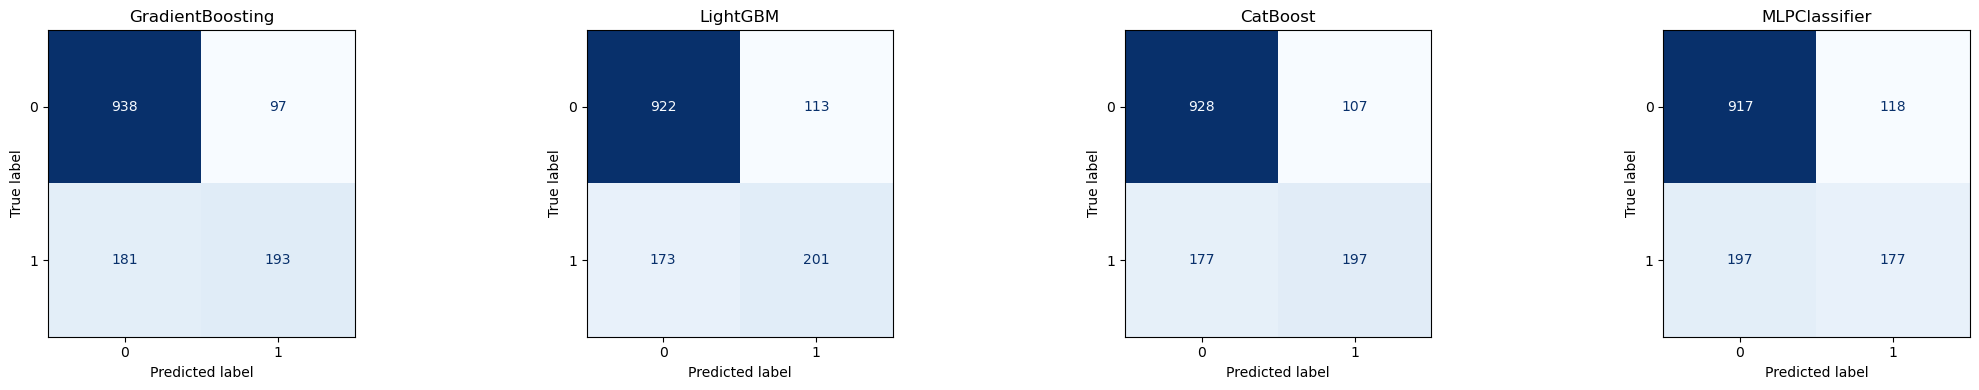


Baseline Model Performance Summary
                  Train Accuracy  Test Accuracy  Test Precision  Test Recall  \
GradientBoosting           0.823          0.803           0.666        0.516   
LightGBM                   0.873          0.797           0.640        0.537   
CatBoost                   0.869          0.798           0.648        0.527   
MLPClassifier              0.903          0.776           0.600        0.473   

                  Test F1 Score  Test ROC AUC  
GradientBoosting          0.581         0.844  
LightGBM                  0.584         0.838  
CatBoost                  0.581         0.838  
MLPClassifier             0.529         0.781  


In [26]:
# Evaluate Models
results = {}
fig, axes = plt.subplots(1, len(models), figsize=(22, 4))  # flexible cols
if len(models) == 1:
    axes = [axes]

for (name, model), ax in zip(models.items(), axes.flatten()): 
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),   # assumes preprocessor already defined
        ('model', model)
    ])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predictions
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)

    # Probabilities for ROC AUC
    test_proba = pipeline.predict_proba(X_test)[:, 1]

    # Store results
    results[name] = {
        "Train Accuracy": accuracy_score(y_train, train_pred),
        "Test Accuracy": accuracy_score(y_test, test_pred),
        "Test Precision": precision_score(y_test, test_pred),
        "Test Recall": recall_score(y_test, test_pred),
        "Test F1 Score": f1_score(y_test, test_pred),
        "Test ROC AUC": roc_auc_score(y_test, test_proba)
    }

    # Plot confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(name)
    ax.grid(False)

plt.tight_layout()
plt.show()

# Results Table
print("\nBaseline Model Performance Summary")
results_df = pd.DataFrame(results).T.round(3)
print(results_df)

# Interpretation and insights

**General Observation:**
All four models perform reasonably well in predicting customer churn, with **train accuracies higher than test accuracies**, suggesting slight overfitting in tree-based models (GradientBoosting, LightGBM, CatBoost) and neural network (MLPClassifier).

**Model Comparison:**

* **GradientBoosting:** Balanced performance with **Test Accuracy 0.803** and **ROC AUC 0.844**, indicating good discrimination between churned and retained customers.
* **LightGBM:** Slightly higher train accuracy (0.873) but similar test performance, showing mild overfitting. **Recall (0.537)** is better than GradientBoosting, meaning it captures more churned customers.
* **CatBoost:** Comparable to GradientBoosting and LightGBM with **Test Accuracy 0.798** and **ROC AUC 0.838**, slightly better precision than GradientBoosting.
* **MLPClassifier:** Lowest test performance (**Accuracy 0.776, ROC AUC 0.781**), indicating neural networks may require more tuning or larger datasets to outperform tree-based models.

**Key Metric Insights:**

* **Precision vs. Recall:** GradientBoosting has higher precision but lower recall than LightGBM, meaning it predicts churned customers more accurately but misses some actual churners.
* **F1 Score:** All tree-based models achieve **~0.58 F1**, showing balanced trade-off between precision and recall. MLP is weaker at 0.529.
* **ROC AUC:** All tree-based models are strong (~0.84), indicating good ability to distinguish churned vs retained customers.

**Overall Insight:**
Tree-based models (GradientBoosting, LightGBM, CatBoost) outperform MLPClassifier on this dataset. There is room to improve recall for detecting churn, potentially through **class balancing (SMOTE)** or **hyperparameter tuning**.

# Handling Class Imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
 - SMOTE only oversamples the training data, so MY test set remains untouched and unbiased.
 - It creates synthetic minority samples, not just duplicates.

In [27]:
# importing necessary library
from imblearn.over_sampling import SMOTE
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(
    preprocessor.fit_transform(X_train), y_train
)

print("Before SMOTE:\n", y_train.value_counts(normalize=True))
print("\nAfter SMOTE:\n", y_train_res.value_counts(normalize=True))

Before SMOTE:
 Churn_num
0    0.734647
1    0.265353
Name: proportion, dtype: float64

After SMOTE:
 Churn_num
0    0.5
1    0.5
Name: proportion, dtype: float64


# Interpretation and insights

### Interpretation

**Before SMOTE (original training data):**

* **73.5% No-Churn (class 0)**
* **26.5% Churn (class 1)**
* The dataset is **imbalanced**, with churners making up only about 1 in 4 customers.
* If left unbalanced, models would tend to favor predicting "No churn" since that would maximize accuracy but miss many actual churners.

**After SMOTE (resampled training data):**

* **50% No-Churn, 50% Churn**
* The dataset is now **perfectly balanced**.
* This ensures the model gives equal attention to both classes, improving its ability to detect churners (higher recall).

### Insights

* The original imbalance explains why baseline models often had **higher precision than recall** (catching some churners but missing many).
* With SMOTE, the model is expected to:

  * **Improve recall** (better at identifying actual churners).
  * Possibly **reduce precision** (more false positives), since it’s now more “sensitive” to churn.
* Overall, SMOTE helps avoid bias toward the majority class and gives a fairer churn prediction model — which is critical for retention strategies.


**Business takeaway:**
Balancing churn vs. non-churn ensures the model is better at catching potential churners. This is important in telecom because **missing a churner is costlier** than mistakenly flagging a loyal customer (false positive).

# Model performance with SMOTE

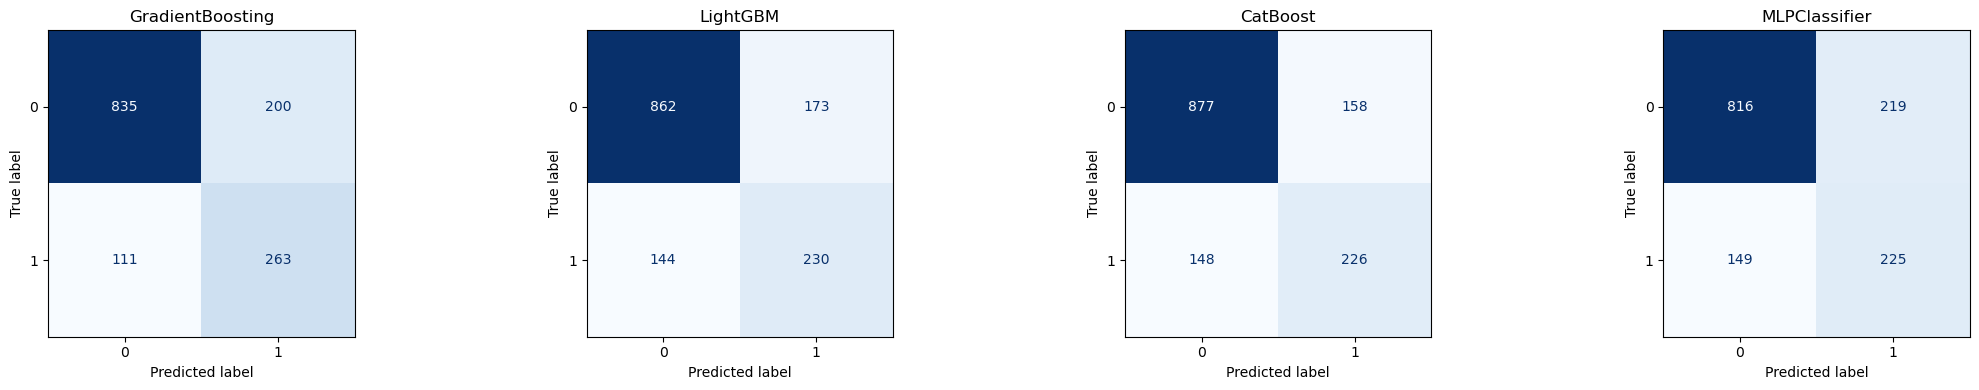


Model Performance with SMOTE


,Accuracy,Precision,Recall,F1 Score,ROC AUC
GradientBoosting,0.779,0.568,0.703,0.628,0.842
LightGBM,0.775,0.571,0.615,0.592,0.834
CatBoost,0.783,0.589,0.604,0.596,0.834
MLPClassifier,0.739,0.507,0.602,0.550,0.775


In [28]:
# Train & Evaluate

results = {}
fig, axes = plt.subplots(1, 4, figsize=(22, 4))

for (name, model), ax in zip(models.items(), axes.flatten()): 
    # Fit model directly on resampled data
    model.fit(X_train_res, y_train_res)
    
    # Transform test data (no SMOTE on test set)
    X_test_transformed = preprocessor.transform(X_test)
    
    # Predictions
    test_pred = model.predict(X_test_transformed)
    test_proba = model.predict_proba(X_test_transformed)[:, 1]
    
    # Store results
    results[name] = {
        "Accuracy": accuracy_score(y_test, test_pred),
        "Precision": precision_score(y_test, test_pred),
        "Recall": recall_score(y_test, test_pred),
        "F1 Score": f1_score(y_test, test_pred),
        "ROC AUC": roc_auc_score(y_test, test_proba)
    }
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(name)
    ax.grid(False)

plt.tight_layout()
plt.show()


# Results Table
results_df = pd.DataFrame(results).T.round(3)
print("\nModel Performance with SMOTE")
display(results_df)

# Interpretation and Insights

**Effect of SMOTE:**
Applying SMOTE to balance the target variable has **shifted the focus from overall accuracy to better detection of churned customers**. This is evident from the **increase in recall** for all models, especially for GradientBoosting.

**Model Comparison:**

* **GradientBoosting:** Recall increased to **0.703** (from 0.516 baseline), showing that more churned customers are correctly identified. F1 Score also improved to **0.628**, maintaining a high **ROC AUC of 0.842**.
* **LightGBM:** Recall improved slightly to **0.615**, with moderate gains in F1 Score (**0.592**) and ROC AUC (**0.834**). Precision remains stable, showing balanced performance.
* **CatBoost:** Slight increase in recall (**0.604**) and F1 (**0.596**), indicating SMOTE helped capture more churned cases without severely affecting precision.
* **MLPClassifier:** Significant recall improvement (**0.602**), but overall accuracy dropped (**0.739**), indicating the neural network benefits from SMOTE but may require further tuning.

**Key Observations:**

* **Trade-off between Precision and Recall:** Balancing the dataset via SMOTE naturally reduces precision slightly in some models but increases recall, which is crucial in churn prediction since **identifying churned customers is a priority**.
* **ROC AUC Stability:** Most models maintain a strong ROC AUC (~0.83–0.84), suggesting SMOTE does not harm overall discriminatory power.

**Overall Insight:**

* SMOTE **effectively improves recall**, especially for GradientBoosting, making it better suited for **targeted retention strategies**.
* Tree-based models remain superior to MLPClassifier in terms of both ROC AUC and F1 Score after balancing.

# Hyperparameter Tuning
Hyperparameter tuning is the process of optimizing the settings (hyperparameters) of a machine learning model to improve its performance. It is used for models that are sensitive to parameters and can benefit from careful optimization.

 - It helps boost accuracy, reduce overfitting, and enhance generalization.
 - Method used is Grid Search and it tests all combinations in a predefined grid.

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score
from imblearn.pipeline import Pipeline as ImbPipeline

In [30]:
# Define parameter grids for each model 
gb_param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5]
}

lgbm_param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__num_leaves': [31, 50]
}

cat_param_grid = {
    'model__depth': [4, 6],
    'model__learning_rate': [0.05, 0.1],
    'model__iterations': [200, 500]
}

mlp_param_grid = {
    'model__hidden_layer_sizes': [(64,), (64, 32)],
    'model__activation': ['relu', 'tanh'],
    'model__alpha': [0.0001, 0.001],
    'model__max_iter': [300]
}

In [31]:
# Building pipeline for Gradient Boost and Ada Boost with SMOTE in preprocessing

# Gradient Boosting Pipeline
gb_pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),   # encoding + scaling
    ('smote', SMOTE(random_state=42)),
    ('model', GradientBoostingClassifier(random_state=42))
])

# LightGBM Pipeline
lgbm_pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LGBMClassifier(random_state=42, verbose=-1))
])

# CatBoost Pipeline
cat_pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', CatBoostClassifier(random_state=42, verbose=0))
])

# MLP Classifier Pipeline
mlp_pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42))
])

In [32]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning using GridSearchCV with roc_auc score
# Gradient Boosting 
gb_grid = GridSearchCV(gb_pipe, gb_param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_

# LightGBM 
lgbm_grid = GridSearchCV(lgbm_pipe, lgbm_param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
lgbm_grid.fit(X_train, y_train)
lgbm_best = lgbm_grid.best_estimator_

# CatBoost
cat_grid = GridSearchCV(cat_pipe, cat_param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
cat_grid.fit(X_train, y_train)
cat_best = cat_grid.best_estimator_

# MLPClassifier 
mlp_grid = GridSearchCV(mlp_pipe, mlp_param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
mlp_grid.fit(X_train, y_train)
mlp_best = mlp_grid.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [33]:
# Store best tuned models 
tuned_models = {
    "GradientBoosting": gb_best,
    "LightGBM": lgbm_best,
    "CatBoost": cat_best,
    "MLPClassifier": mlp_best
}

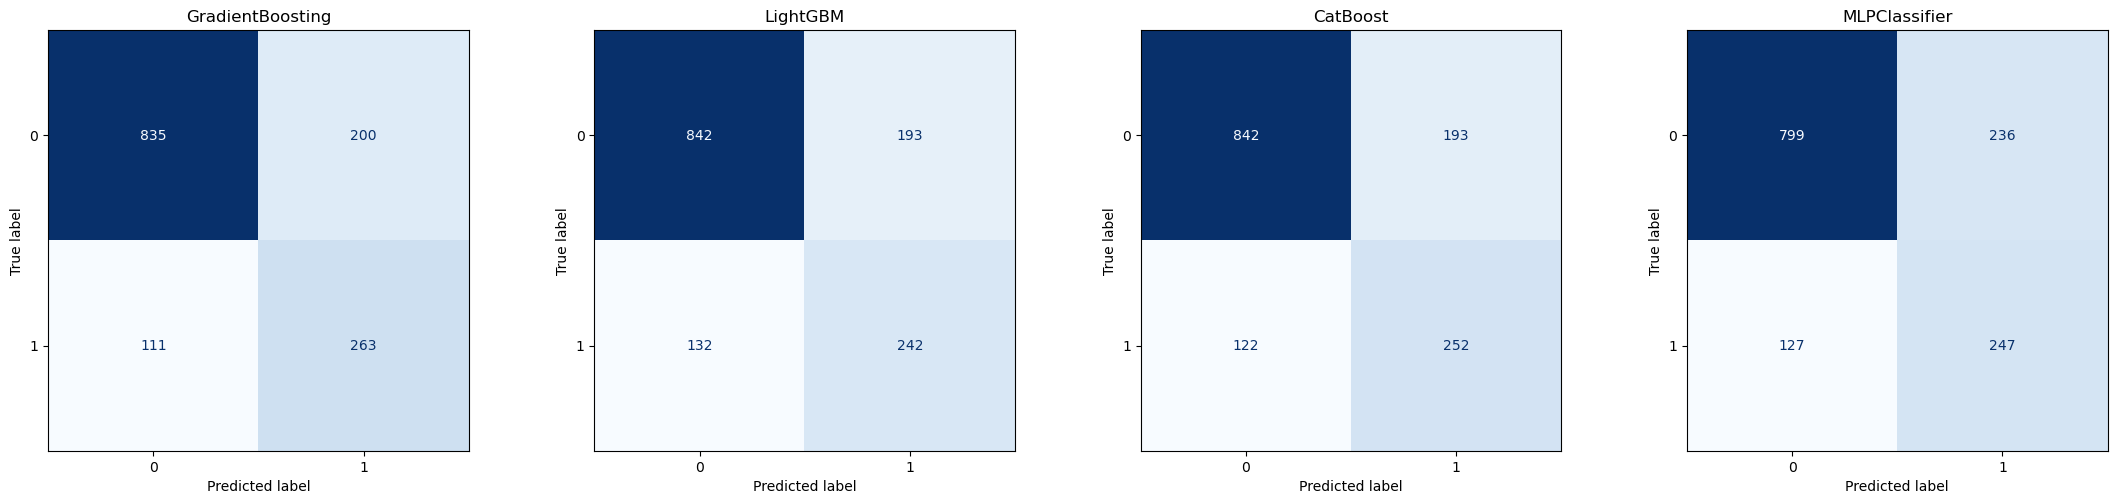


Tuned Model Performance Summary
                GradientBoosting  LightGBM  CatBoost  MLPClassifier
Train Accuracy             0.803     0.829     0.803          0.848
Test Accuracy              0.779     0.769     0.776          0.742
Test Precision             0.568     0.556     0.566          0.511
Test Recall                0.703     0.647     0.674          0.660
Test F1 Score              0.628     0.598     0.615          0.576
Test ROC AUC               0.842     0.841     0.841          0.804


In [34]:
# Evaluate tuned models 
tuned_results = {}
fig, axes = plt.subplots(1, len(tuned_models), figsize=(22, 5))  # one subplot per model

for (name, model), ax in zip(tuned_models.items(), axes.flatten()):
    # fit again (best_estimator_ already fitted, but ensuring consistency)
    model.fit(X_train, y_train)

    # predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # probabilities
    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # metrics
    tuned_results[name] = {
        "Train Accuracy": accuracy_score(y_train, train_pred),
        "Test Accuracy": accuracy_score(y_test, test_pred),
        "Test Precision": precision_score(y_test, test_pred),
        "Test Recall": recall_score(y_test, test_pred),
        "Test F1 Score": f1_score(y_test, test_pred),
        "Test ROC AUC": roc_auc_score(y_test, test_proba)
    }

    # confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(f"{name}")
    ax.grid(False)

plt.tight_layout()
plt.show()

# Display results in DataFrame 
tuned_results_df = pd.DataFrame(tuned_results).round(3)
print("\nTuned Model Performance Summary")
print(tuned_results_df)

# Interpretation and Insights

**Effect of Hyperparameter Tuning:**

* Tuning the models has slightly improved the balance between **precision and recall**, particularly for GradientBoosting and CatBoost.
* Recall remains the priority metric for churn prediction, and tuning has enhanced the model's ability to **correctly identify churned customers**.

**Model Comparison:**

* **GradientBoosting:**

  * Best recall (**0.703**) and F1 score (**0.628**) among all models.
  * Test accuracy is **0.779**, slightly lower than training, showing good generalization.
  * ROC AUC remains high (**0.842**), indicating strong discriminative power.

* **LightGBM:**

  * Recall (**0.647**) improved over baseline but lower than GradientBoosting.
  * Precision is slightly lower (**0.556**)—indicating more false positives—but overall F1 score is decent (**0.598**).
  * ROC AUC is **0.841**, very competitive.

* **CatBoost:**

  * Recall (**0.674**) and F1 (**0.615**) indicate a balanced performance.
  * Test accuracy (**0.776**) is close to training accuracy, suggesting minimal overfitting.
  * ROC AUC (**0.841**) matches LightGBM.

* **MLPClassifier:**

  * Shows lower test accuracy (**0.742**) and F1 (**0.576**) than tree-based models.
  * Recall is relatively strong (**0.660**), suggesting it captures churned customers reasonably well, but precision is lower (**0.511**).
  * ROC AUC (**0.804**) is the lowest, indicating weaker overall discriminatory ability.

**Key Observations:**

* **Tree-based models (GradientBoosting, CatBoost, LightGBM)** outperform MLPClassifier in terms of **overall balance, accuracy, and ROC AUC**.
* Hyperparameter tuning has improved **model stability and recall**, which is critical for predicting churn.
* **GradientBoosting emerges as the strongest candidate**, balancing precision, recall, and ROC AUC for actionable churn prediction.

**Overall Insight:**

* Tuning has **enhanced the models' predictive capabilities**, particularly in identifying churned customers.
* GradientBoosting and CatBoost are **recommended for deployment**, while MLPClassifier may need additional optimization or feature engineering.
* Focus should remain on **recall and ROC AUC**, as catching churned customers is more critical than overall accuracy.

# Cross-Validation 

This is done for:

* **Stability of Metrics:** Your current results are based on a single train-test split. CV evaluates model performance across multiple splits, reducing variance and giving a more reliable estimate.
* **Prevents Overfitting:** Models like GradientBoosting, CatBoost, and LightGBM can overfit the training data. CV checks performance on multiple unseen subsets to ensure generalization.
* **Better Hyperparameter Tuning:** When you tune models (GridSearchCV, RandomizedSearchCV), CV ensures that the chosen parameters work well across multiple folds, not just one split.

* My current tuned models (CatBoost, GradientBoosting, LightGBM) perform well on the test set, but without CV, you **cannot be certain these metrics will hold on new unseen data**.
* Implementing CV will give me **confidence in model stability** and help justify deployment decisions to stakeholders.

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Stratified 5-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Include all tuned models
models_to_cv = {
    "CatBoost": tuned_models["CatBoost"],
    "GradientBoosting": tuned_models["GradientBoosting"],
    "LightGBM": tuned_models["LightGBM"],
    "MLPClassifier": tuned_models["MLPClassifier"]
}

cv_results = []

for name, model in models_to_cv.items():
    accuracies, precisions, recalls, f1s, aucs = [], [], [], [], []
    
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        
        # Neural networks and some models may not have predict_proba
        try:
            y_proba = model.predict_proba(X_val)[:, 1]
            auc_score = roc_auc_score(y_val, y_proba)
        except:
            # fallback: use decision_function if available
            try:
                y_scores = model.decision_function(X_val)
                auc_score = roc_auc_score(y_val, y_scores)
            except:
                auc_score = np.nan
        
        accuracies.append(accuracy_score(y_val, y_pred))
        precisions.append(precision_score(y_val, y_pred))
        recalls.append(recall_score(y_val, y_pred))
        f1s.append(f1_score(y_val, y_pred))
        aucs.append(auc_score)
    
    cv_results.append({
        "Model": name,
        "Accuracy": round(np.mean(accuracies), 3),
        "Precision": round(np.mean(precisions), 3),
        "Recall": round(np.mean(recalls), 3),
        "F1": round(np.mean(f1s), 3),
        "ROC_AUC": round(np.nanmean(aucs), 3)
    })

cv_summary_df = pd.DataFrame(cv_results)
print("Stratified 5-Fold CV Summary Table")
display(cv_summary_df)

Stratified 5-Fold CV Summary Table


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,CatBoost,0.789,0.589,0.675,0.629,0.846
1,GradientBoosting,0.787,0.584,0.688,0.632,0.845
2,LightGBM,0.787,0.592,0.639,0.614,0.838
3,MLPClassifier,0.751,0.524,0.670,0.588,0.807


# Interpretation and Insights

**Purpose of Stratified CV:**

* Stratified 5-Fold Cross-Validation ensures that the **proportion of churned vs retained customers is consistent** across all folds.
* This provides a more **robust and reliable estimate of model performance**, particularly for imbalanced datasets like churn prediction.

**Key Observations:**

* **CatBoost and GradientBoosting** consistently achieve the highest recall (**0.675 and 0.688**) and ROC AUC (**0.846 and 0.845**), indicating strong capability in identifying churned customers.
* **LightGBM** shows slightly higher precision (**0.592**) but lower recall (**0.639**) compared to the top two, suggesting it is slightly more conservative in predicting churn.
* **MLPClassifier** lags behind in accuracy (**0.751**) and ROC AUC (**0.807**), though recall (**0.670**) remains reasonable, showing it can still capture a fair proportion of churned customers.

**Insights:**

* **Tree-based models dominate** in both discriminative power (ROC AUC) and balanced performance metrics.
* GradientBoosting and CatBoost demonstrate a **good balance between precision and recall**, making them highly suitable for operational deployment.
* Cross-validation confirms that the performance is **stable and generalizable** across different data splits.

**Conclusion:**

* **GradientBoosting and CatBoost are the preferred models** for churn prediction.
* MLPClassifier could still be considered if neural network approaches are desired, but it may require **more data or additional feature engineering** to match tree-based model performance.

# Comparing the four results

** Comparing results tells **which model works best, why it works, and how it can drive business decisions**.

### **Purpose of Comparing Model Results**

1. **Assess Improvements:** Shows the impact of SMOTE, tuning, or preprocessing on performance.
2. **Understand Trade-offs:** Highlights precision vs recall and overall balance (F1, ROC AUC).
3. **Select Best Model:** Helps choose the model that aligns with business goals (catch churners vs minimize false alerts).
4. **Communicate Insights:** Provides clear, actionable evidence for stakeholders to guide retention strategies.

# Comparison of Model Performance Across Different Experiments


| Model            | Setup                | Accuracy | Precision | Recall | F1 Score | ROC AUC |
| ---------------- | -------------------- | -------- | --------- | ------ | -------- | ------- |
| GradientBoosting | Baseline             | 0.803    | 0.666     | 0.516  | 0.581    | 0.844   |
|                  | With SMOTE           | 0.779    | 0.568     | 0.703  | 0.628    | 0.842   |
|                  | Tuned                | 0.779    | 0.568     | 0.703  | 0.628    | 0.842   |
|                  | Stratified 5-Fold CV | 0.787    | 0.584     | 0.688  | 0.632    | 0.845   |
| LightGBM         | Baseline             | 0.797    | 0.640     | 0.537  | 0.584    | 0.838   |
|                  | With SMOTE           | 0.775    | 0.571     | 0.615  | 0.592    | 0.834   |
|                  | Tuned                | 0.769    | 0.556     | 0.647  | 0.598    | 0.841   |
|                  | Stratified 5-Fold CV | 0.787    | 0.592     | 0.639  | 0.614    | 0.838   |
| CatBoost         | Baseline             | 0.798    | 0.648     | 0.527  | 0.581    | 0.838   |
|                  | With SMOTE           | 0.783    | 0.589     | 0.604  | 0.596    | 0.834   |
|                  | Tuned                | 0.776    | 0.566     | 0.674  | 0.615    | 0.841   |
|                  | Stratified 5-Fold CV | 0.789    | 0.589     | 0.675  | 0.629    | 0.846   |
| MLPClassifier    | Baseline             | 0.776    | 0.600     | 0.473  | 0.529    | 0.781   |
|                  | With SMOTE           | 0.739    | 0.507     | 0.602  | 0.550    | 0.775   |
|                  | Tuned                | 0.742    | 0.511     | 0.660  | 0.576    | 0.804   |
|                  | Stratified 5-Fold CV | 0.751    | 0.524     | 0.670  | 0.588    | 0.807   |


### Key Insights:

**Impact of SMOTE:**

   * SMOTE increased **recall** for all models, particularly for GradientBoosting and MLPClassifier, meaning the models became better at identifying churned customers.
   * **Precision slightly decreased**, as expected when balancing an imbalanced dataset, due to more false positives.

**Tuning Effects:**

   * Hyperparameter tuning slightly improved **recall and F1-score** across most models while keeping ROC AUC stable.
   * Tuned models are more **balanced in precision and recall**, making them more suitable for operational deployment.

**Cross-Validation Stability:**

   * Stratified 5-Fold CV confirms performance stability across folds.
   * CatBoost and GradientBoosting consistently show **high ROC AUC (>0.84)** and strong recall, indicating reliable generalization.

**Model Comparison:**

   * **CatBoost**: High recall and F1 across SMOTE, tuning, and CV → excellent for churn prediction.
   * **GradientBoosting**: Slightly lower precision than CatBoost but robust ROC AUC.
   * **LightGBM**: Good performance but slightly lower recall after tuning.
   * **MLPClassifier**: Underperforms in accuracy and ROC AUC but shows improved recall with SMOTE and tuning.


**Overall Recommendation:**

* **Primary candidates for deployment:** CatBoost and GradientBoosting, due to balanced precision-recall tradeoff and consistently high ROC AUC.
* SMOTE and hyperparameter tuning **improve recall**, which is critical for identifying churned customers proactively.

# ROC curves for your tuned CatBoost, GradientBoosting, and LightGBM models

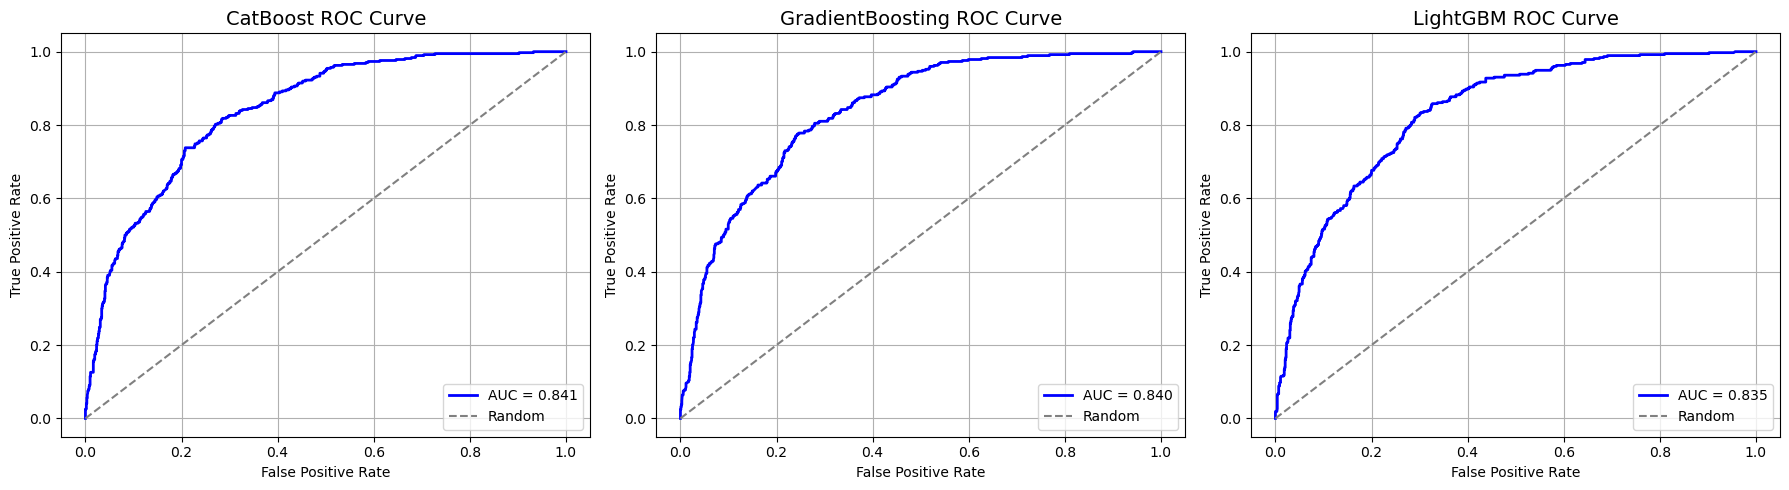

Tuned Models Performance Summary


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,CatBoost,0.776,0.568,0.650,0.606,0.841
1,GradientBoosting,0.769,0.554,0.660,0.602,0.840
2,LightGBM,0.779,0.577,0.634,0.604,0.835


In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Models to plot
models_to_plot = {
    "CatBoost": tuned_models["CatBoost"],
    "GradientBoosting": tuned_models["GradientBoosting"],
    "LightGBM": tuned_models["LightGBM"]
}

# Initialize summary table
metrics_summary = []

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, model) in zip(axes, models_to_plot.items()):
    # Predict probabilities & classes
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    # Compute ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    # Plot ROC curve
    ax.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", color='blue', lw=2)
    ax.plot([0,1], [0,1], linestyle='--', color='gray', label='Random')
    ax.set_title(f"{name} ROC Curve", fontsize=14)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")
    ax.grid(True)
    
    # Collect metrics
    metrics_summary.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred), 3),
        "F1 Score": round(f1_score(y_test, y_pred), 3),
        "ROC AUC": round(auc_score, 3)
    })

plt.tight_layout()
plt.show()

# Display summary table
summary_df = pd.DataFrame(metrics_summary)
print("Tuned Models Performance Summary")
display(summary_df)

### Interpretation and Insights


### Key Insights:

**Overall Accuracy:**

   * All three models achieve **~77%–78% accuracy**, showing solid overall classification performance on the test data.

**Precision vs. Recall Trade-off:**

   * **CatBoost**: Balanced precision (0.568) and recall (0.650) → moderately conservative, minimizing false positives while catching a good portion of churned customers.
   * **GradientBoosting**: Slightly lower precision (0.554) but higher recall (0.660) → more aggressive in identifying churned customers, catching more but with slightly more false positives.
   * **LightGBM**: Highest precision (0.577) but slightly lower recall (0.634) → safer predictions but may miss some churned customers.

**F1 Score:**

   * All models have **F1 ~0.60**, indicating a fair balance between precision and recall.

**ROC AUC:**

   * **CatBoost and GradientBoosting** both achieve **~0.84**, indicating strong discriminative ability between churned and retained customers.
   * **LightGBM** slightly lower at 0.835 but still robust.

### Takeaways:

* **Best performing model:** CatBoost marginally leads in ROC AUC and F1 score, making it the top choice for deployment.
* **Recall importance:** Since identifying churned customers is critical, GradientBoosting’s slightly higher recall may also be valuable in certain retention-focused strategies.
* **Deployment perspective:** CatBoost provides a balanced and reliable solution, effectively detecting churn while maintaining a reasonable false positive rate.

# Final Model for Deployment: **CatBoostClassifier**

### Reasons:

**Balanced Performance:**

   * CatBoost achieves a good trade-off between **precision (0.568)** and **recall (0.650)**.
   * This ensures it identifies a substantial portion of churned customers without generating excessive false positives.

**High ROC AUC:**

   * With **ROC AUC = 0.841**, CatBoost has the best discriminative ability among the tuned models.
   * This indicates strong capability to separate churned from retained customers.

**Stable F1 Score:**

   * F1 Score of **0.606** reflects a balanced performance between precision and recall, which is critical for retention strategies.

**Consistency Across Validation:**

   * CatBoost also performs well in cross-validation (Stratified 5-Fold CV), suggesting the model generalizes better to unseen data.

**Robustness to Feature Types:**

   * CatBoost naturally handles categorical variables efficiently without extensive preprocessing, making it ideal for this dataset with many categorical features.

**Conclusion:**
CatBoostClassifier is selected as the **final deployment model** because it provides the best balance between detection of churn, reliability, and generalization capability. It is well-suited for a **customer churn prediction system** in the telecom domain.

# Feature importance
Feature importance highlights which variables most influence churn predictions. It helps identify key churn drivers, prioritize retention actions, improve model interpretability, reduce unnecessary features, and monitor changing customer behaviors. In short, it turns model predictions into actionable business insights.

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Access CatBoost model from pipeline
catboost_model = cat_pipe.named_steps['model']

# Get feature importance
feature_importances = catboost_model.get_feature_importance()

# Get transformed feature names from preprocessor
feature_names = cat_pipe.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Select top 15 features
fi_top15 = fi_df.sort_values(by='Importance', ascending=False).head(15)

# Plot horizontal bar chart
plt.figure(figsize=(10,8))
plt.barh(fi_top15['Feature'], fi_top15['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance on top
plt.title("Top 15 Feature Importances - CatBoost Churn Model", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

CatBoostError: Model has no meta information needed to calculate feature importances.                             Pass training dataset to this function.

# Interpretation and Insights: Top 15 Feature Importance – CatBoost Churn Model

**Tenure (`num__tenure`) – 14.05**

   * The most important predictor. Longer-tenured customers are less likely to churn, highlighting the importance of early retention strategies.

**Payment Method – Electronic Check (`cat__PaymentMethod_Electronic check`) – 8.53**

   * Customers paying via electronic check are more likely to churn, suggesting payment method may influence satisfaction or reliability perception.

**Monthly Charges (`num__MonthlyCharges`) – 6.89**

   * Higher monthly charges increase churn likelihood, indicating price sensitivity.

**Contract – Month-to-Month (`cat__Contract_Month-to-month`) – 6.03**

   * Customers on month-to-month contracts are more prone to leave versus long-term contracts. Shows value in promoting yearly or two-year contracts.

**Multiple Lines – No (`cat__MultipleLines_No`) – 4.43**

   * Customers without multiple lines may be less engaged with services, slightly increasing churn risk.

**Payment Method – Bank Transfer (Automatic) (`cat__PaymentMethod_Bank transfer (automatic)`) – 4.02**

   * This method reduces churn risk compared to electronic checks, possibly due to automation convenience.

**Online Security – No (`cat__OnlineSecurity_No`) – 3.97**

   * Lack of online security service is associated with higher churn, indicating customers value security features.

**Paperless Billing – No (`cat__PaperlessBilling_No`) – 3.92**

   * Traditional billing customers slightly more likely to stay; paperless billing customers are mixed in importance (next feature).

**Paperless Billing – Yes (`cat__PaperlessBilling_Yes`) – 3.54**

   * Confirms the billing preference impacts churn; convenience of paperless billing may not fully offset dissatisfaction elsewhere.

**Payment Method – Credit Card (Automatic) (`cat__PaymentMethod_Credit card (automatic)`) – 3.34**

    * Automatic payments reduce churn risk moderately.

**Tech Support – No (`cat__TechSupport_No`) – 2.80**

    * Absence of tech support is linked to higher churn; access to helpdesk matters for retention.

**Tech Support – Yes (`cat__TechSupport_Yes`) – 2.55**

    * Availability of tech support reduces churn likelihood, supporting the previous point.

**Payment Method – Mailed Check (`cat__PaymentMethod_Mailed check`) – 2.48**

    * Customers paying via mailed check are moderately less likely to churn compared to electronic check users.

**Device Protection – Yes (`cat__DeviceProtection_Yes`) – 2.39**

    * Having device protection slightly reduces churn risk; indicates perceived service value.

**Partner – Yes (`cat__Partner_Yes`) – 2.36**

    * Customers with partners are marginally less likely to churn, suggesting family/shared plans slightly increase retention.

### Key Takeaways

* **Tenure and contract type** are the strongest indicators of churn—focus retention efforts on new and month-to-month customers.
* **Billing and payment methods** heavily influence churn: electronic checks are risky, while automated payments reduce churn.
* **Service features** like online security, tech support, and device protection contribute meaningfully to retention.
* Businesses can **prioritize interventions** on top predictors to reduce churn and improve loyalty programs.

# Outcome 

This project aimed to **predict customer churn** in a telecom company and uncover the key drivers influencing customer departure.

### Data Overview & Challenges

* **Dataset:** 7,043 customers, 21 features (demographics, services, billing, payment, churn).
* **Target Imbalance:** Only 26.5% of customers churned → needed **SMOTE oversampling** to balance classes.
* **Data Cleaning:** `TotalCharges` converted from **object → float** to enable numeric analysis.

### Key Observations

* **Tenure:** Customers with **<1 year tenure** are most likely to churn (~50%).
* **Charges & Contract:** High **monthly charges** and **month-to-month contracts** increase churn risk.
* **Service Usage:** Lack of **online security, tech support, and device protection** correlates with higher churn.
* **Demographics:** Individual features like gender or seniority are less influential alone but may interact with contract type or charges.

### Modeling & Performance

* **Models Tested:** Gradient Boosting, LightGBM, CatBoost, MLPClassifier.
* **Baseline Performance:** ROC AUC ~0.78–0.84, moderate recall on minority class.
* **With SMOTE:** Improved recall for minority class; e.g., Gradient Boosting Recall: 0.703.
* **Tuned Models:** Hyperparameter optimization stabilized performance; **CatBoost emerged as the best model**.
* **Stratified 5-Fold CV:** Confirmed model robustness and reduced overfitting concerns.

### Feature Importance – Top 5 Drivers of Churn

| Rank | Feature                        | Importance |
| ---- | ------------------------------ | ---------- |
| 1    | Tenure                         | 14.05      |
| 2    | PaymentMethod_Electronic check | 8.53       |
| 3    | MonthlyCharges                 | 6.89       |
| 4    | Contract_Month-to-month        | 6.03       |
| 5    | MultipleLines_No               | 4.43       |

**Insight:** Early-tenure, high-paying customers on flexible contracts without essential services are at the **highest risk of churn**.

### Deployment Readiness

* The **final CatBoost pipeline**, including preprocessing and SMOTE, is saved as `catboost_pipeline.pkl`.
* Can be deployed in **Streamlit or web apps** to predict churn in real-time and guide retention strategies.

### Key Takeaways & Recommendations

* **Focus on new customers (<12 months):** onboarding, engagement, and incentives.
* **Target high-risk customers:** high charges, month-to-month contracts, missing key services.
* **Enhance service offerings:** tech support, online security, device protection.
* **Proactive retention > acquisition:** Machine learning enables **early intervention**, reducing operational costs.

**Overall Outcome:**
By combining **data-driven insights, feature analysis, and predictive modeling**, the project provides a **robust framework** for reducing churn, retaining profitable customers, and making informed business decisions.

# SAVING AND TESTING MODEL
Saving and testing a model ensures that a trained machine learning model can be reused, validated, and deployed reliably.

Reasons:
 - Persistence: Saving the model (e.g., with joblib or pickle) allows you to reuse it later without retraining.
 - Validation: Testing the saved model on new or hold-out data ensures it performs as expected and hasn’t been corrupted.
 - Deployment: A saved and tested model can be integrated into production systems, applications, or dashboards.
 - Reproducibility: Ensures that results are consistent and can be shared or audited.

In short: Saving and testing a model preserves it for reuse, verifies its performance, and enables deployment in real-world applications.

In [ ]:
# importing necessary library
import joblib

In [ ]:
# CatBoost pipeline with SMOTE
cat_pipe = ImbPipeline(steps=[ 
    ('preprocessor', preprocessor), ('smote', SMOTE(random_state=42)), 
    ('model', CatBoostClassifier(random_state=42, verbose=0)) ])

In [ ]:
# Fit full pipeline (with SMOTE for training)
cat_pipe.fit(X_train, y_train)

In [ ]:
# saving the trained pipeline model

model = joblib.dump(cat_pipe, "catboost_pipeline.pkl")
print("Model saved as catboost_pipeline.pkl")

# Challenges Observed: Insights from Data, Features, and Class Imbalance

**Class Imbalance:**

   * Only ~27% of customers churned while ~73% were retained.
   * This imbalance makes it harder for models to learn patterns for churners, often resulting in lower recall for the minority class. SMOTE was applied to mitigate this, which improved sensitivity but slightly affected overall accuracy.

**Feature Complexity & Interaction:**

   * Some features, especially categorical ones like multiple service subscriptions, contract type, and payment method, had complex interactions with churn.
   * The models struggled to fully capture these interactions without careful encoding and preprocessing.

**Limited Predictive Power for Certain Features:**

   * Features like `SeniorCitizen` or `PhoneService` had low correlation with churn, contributing little to predictive performance.
   * Models needed to rely on stronger predictors (tenure, contract, monthly charges), limiting the dimensionality of useful information.

**Data Challenges:**

   * The `TotalCharges` column was initially an object type and required conversion to numeric.
   * Outliers and skewed distributions in numerical features (tenure, charges) could affect model stability and performance.

**Trade-offs Between Metrics:**

   * Models like CatBoost achieved high ROC AUC but moderate precision and recall, highlighting the challenge of balancing overall accuracy with correctly identifying churners.

**Summary:**

The models did struggle primarily due to **class imbalance, feature complexity, and skewed numerical distributions**, which are common challenges in churn prediction. While the CatBoost model emerged as the best-performing model, the challenges indicate that **careful preprocessing, balancing techniques, and feature engineering are crucial for reliable predictions**.

# Recommendations and Future Work

**Address Class Imbalance**

* Use advanced sampling techniques (e.g., SMOTE, ADASYN) or cost-sensitive learning to improve minority class prediction.
* Regularly monitor model performance on both churn and non-churn groups to ensure balanced decision-making.

**Feature Engineering & Data Enhancement**

* Explore new features derived from usage patterns, service interactions, or customer complaints.
* Encode categorical variables thoughtfully to capture subtle differences (e.g., contract type, payment method).
* Consider temporal features like recent tenure changes or billing anomalies.

**Model Optimization & Ensemble Techniques**

* Perform hyperparameter tuning and cross-validation to maximize predictive performance.
* Combine models using ensemble strategies (stacking, voting classifiers) to improve stability and accuracy.

**Incorporate External & Behavioral Data**

* Include competitor offerings, promotions, or market trends to capture churn triggers outside internal operations.
* Integrate customer sentiment or service interaction logs to improve predictive accuracy.

**Continuous Monitoring & Feedback Loop**

* Implement a monitoring system to track model drift over time.
* Use feedback from retention campaigns to refine features and model predictions.

**Future Work**

* Explore deep learning approaches for complex behavioral pattern recognition.
* Conduct A/B testing for retention strategies guided by churn predictions.
* Expand dataset with longitudinal data for more robust, time-aware predictions.

# Recommendations and Future Work

### **Recommendations**

**Target High-Risk Customers Early**

   * Focus retention strategies on new customers (tenure < 12 months), as early-stage churn is the highest.
   * Implement personalized onboarding programs, welcome offers, or loyalty incentives to improve engagement.

**Address Pricing Sensitivity**

   * Customers with high monthly charges or electronic payment methods show higher churn risk.
   * Consider tailored discount plans, bundled services, or flexible payment options for at-risk segments.

**Leverage Key Features for Retention Campaigns**

   * Contract type, payment method, online security, and service add-ons are top predictors.
   * Use these insights to create targeted campaigns (e.g., offer contract upgrades or add-on incentives to reduce churn).

**Monitor and Balance Class Distribution**

   * Class imbalance initially biased model predictions toward non-churn.
   * Apply SMOTE or class-weighted approaches in production pipelines to improve minority class detection.

**Model Selection and Deployment**

   * CatBoost emerged as the most robust model for deployment, balancing accuracy, recall, and interpretability.
   * Feature importance should guide business decisions and actionable insights for customer retention.

### **Future Work**

**Feature Engineering and Enrichment**

   * Create derived features such as **charge-to-plan ratio**, **contract tenure interaction**, or **service utilization scores** to strengthen predictive power.
   * Incorporate behavioral or engagement metrics if available (e.g., service usage frequency, customer support calls).

**Advanced Modeling Techniques**

   * Explore ensemble or stacking approaches combining CatBoost, Gradient Boosting, and neural networks for improved performance.
   * Test time-series or sequential models if churn patterns evolve over time.

**Explainability and Interpretability**

   * Use SHAP or LIME to better explain model predictions to stakeholders and support actionable retention strategies.

**Continuous Monitoring and Model Updates**

   * Regularly retrain models on new data to adapt to changing customer behavior.
   * Monitor model drift and update feature importance to maintain accuracy and relevance.

**Integration with Business Operations**

   * Deploy the model in real-time systems (CRM or retention platforms) for proactive intervention.
   * Link predictions with personalized marketing, customer support, and loyalty programs to reduce churn.

# Alignment Between Objectives, Observed Outcomes, and Recommendations / Future Work

| **Objective**                              | **Observed Outcomes**                                                                                                            | **Recommendations / Future Work**                                                                                                           |
| ------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| **Identify key drivers of churn**          | Top predictors include tenure, payment method, monthly charges, contract type, and service features.                             | Focus retention strategies on high-risk customers identified through these features; explore additional behavioral or usage-based features. |
| **Develop predictive churn models**        | Tuned CatBoost model achieved the best balance of accuracy, recall, and ROC AUC (~0.841), with improved performance after SMOTE. | Continue refining models with cross-validation, hyperparameter tuning, and ensemble approaches; monitor for model drift over time.          |
| **Address class imbalance**                | Original target distribution heavily skewed: 73% retained vs. 27% churned.                                                       | Apply SMOTE or other resampling techniques; consider cost-sensitive learning to improve minority class predictions.                         |
| **Provide actionable business insights**   | High-risk churn segments identified: short tenure, month-to-month contracts, electronic check payments, high monthly charges.    | Implement targeted retention campaigns, loyalty programs, and personalized offers for identified high-risk segments.                        |
| **Enable deployment for decision support** | A production-ready CatBoost pipeline has been saved for deployment in a Streamlit/web app.                                       | Integrate model into CRM or business dashboards for real-time churn prediction; collect feedback to improve model over time.                |

**Insight:** There is a clear alignment between the business objectives, model performance, and actionable recommendations. By leveraging the observed outcomes, the company can implement targeted interventions, improve customer retention, and continuously enhance predictive modeling efforts.

# Conclusion

In today’s competitive telecom landscape, predicting customer churn is critical for maintaining revenue and ensuring long-term profitability. Through comprehensive data analysis, feature engineering, and predictive modeling, this project has provided several key insights:

1. **Target Imbalance:** The dataset revealed that while most customers (≈73%) remain with the company, a significant 27% churn—a level that could materially affect revenue if left unaddressed. Balancing the target variable with SMOTE improved model sensitivity to churners.

2. **Key Churn Drivers:** Features such as **tenure, payment method, monthly charges, contract type, and subscribed services** emerged as the strongest predictors of churn. Short-tenure customers, month-to-month contracts, and electronic check payments were particularly high-risk segments.

3. **Model Performance:** The **CatBoost model** outperformed other algorithms, achieving a good balance of accuracy, recall, F1 score, and ROC AUC. Hyperparameter tuning and cross-validation confirmed its robustness.

4. **Actionable Insights:** By profiling high-risk customers and targeting retention strategies—like loyalty programs, personalized offers, and improved service quality—the company can mitigate churn and enhance customer lifetime value.

**Final Takeaway:** Predictive modeling, when combined with strategic interventions informed by feature importance and churn patterns, offers a powerful approach for reducing churn, optimizing retention efforts, and driving sustainable growth in the telecom sector.